Датасет `data_bin.csv` містить дані про студентів та підсумкові семестрові оцінки. 

Цільовою змінною є "PASSED" -- приймає два значення 

   * `True` якщо оцінка за семестр є більшою за 10
   * `False` якщо оцінка за семестр є меншою за 11

Файл `attributes.csv` містить повні назви ознак.

Датасет `predict.csv` не містить значень цільової змінної і призначений для зовнішнього оцінювання.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings


warnings.filterwarnings("ignore")

sns.set_style("darkgrid")

/home/user/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Завдання 1

[2 бали] 

Імпортувати датасет `data.csv` у об'єкт `DataFrame` і провести попередній аналіз даних засобами `pandas`, `matplotlib`, `seaborn`. 

Цільовою змінною є "PASSED"

In [2]:
df = pd.read_csv("data_bin.csv")
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,sem,PASSED
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,4,-2.302585,True
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,2,2.208274,True
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,6,2.493205,True
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,0,2.646175,True
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,0,2.406945,True
5,GP,M,16,U,LE3,T,4,3,services,other,...,no,5,4,2,1,2,5,6,2.493205,True
6,GP,M,16,U,LE3,T,2,2,other,other,...,no,4,4,4,1,1,3,0,2.493205,True
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,no,4,1,4,1,1,1,2,2.312535,True
8,GP,M,15,U,LE3,A,3,2,services,other,...,no,4,2,2,1,1,1,0,2.714695,True
9,GP,M,15,U,GT3,T,3,4,other,other,...,no,5,5,1,1,1,5,0,2.493205,True


In [3]:
df.duplicated().sum()

5

In [4]:
df.shape

(944, 32)

In [5]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'sem', 'PASSED'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      944 non-null    object 
 1   sex         944 non-null    object 
 2   age         944 non-null    int64  
 3   address     944 non-null    object 
 4   famsize     944 non-null    object 
 5   Pstatus     944 non-null    object 
 6   Medu        944 non-null    int64  
 7   Fedu        944 non-null    int64  
 8   Mjob        944 non-null    object 
 9   Fjob        944 non-null    object 
 10  reason      944 non-null    object 
 11  guardian    944 non-null    object 
 12  traveltime  944 non-null    int64  
 13  studytime   944 non-null    int64  
 14  failures    944 non-null    int64  
 15  schoolsup   944 non-null    object 
 16  famsup      944 non-null    object 
 17  paid        944 non-null    object 
 18  activities  944 non-null    object 
 19  nursery     944 non-null    o

In [7]:
numeric_features, categorical_features = df.select_dtypes([np.number]).columns, df.select_dtypes([np.object_]).columns
numeric_features, categorical_features

(Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
        'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'sem'],
       dtype='object'),
 Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
        'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
        'nursery', 'higher', 'internet', 'romantic'],
       dtype='object'))

In [8]:
my_num_features, my_cat_features = ["age", "absences", "sem"], ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'schoolsup', 'famsup', 'paid', 'activities', 'failures', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']

In [9]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,sem
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,16.688559,2.636653,2.404661,1.507415,1.985169,0.253178,3.940678,3.192797,3.145127,1.475636,2.282839,3.527542,4.385593,2.284653
std,1.204638,1.129181,1.098258,0.723744,0.832653,0.645147,0.907538,1.028188,1.137949,0.877091,1.268545,1.434791,6.331564,0.679939
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-2.302585
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,2.208274
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,2.406945
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,2.572612
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,2.949688


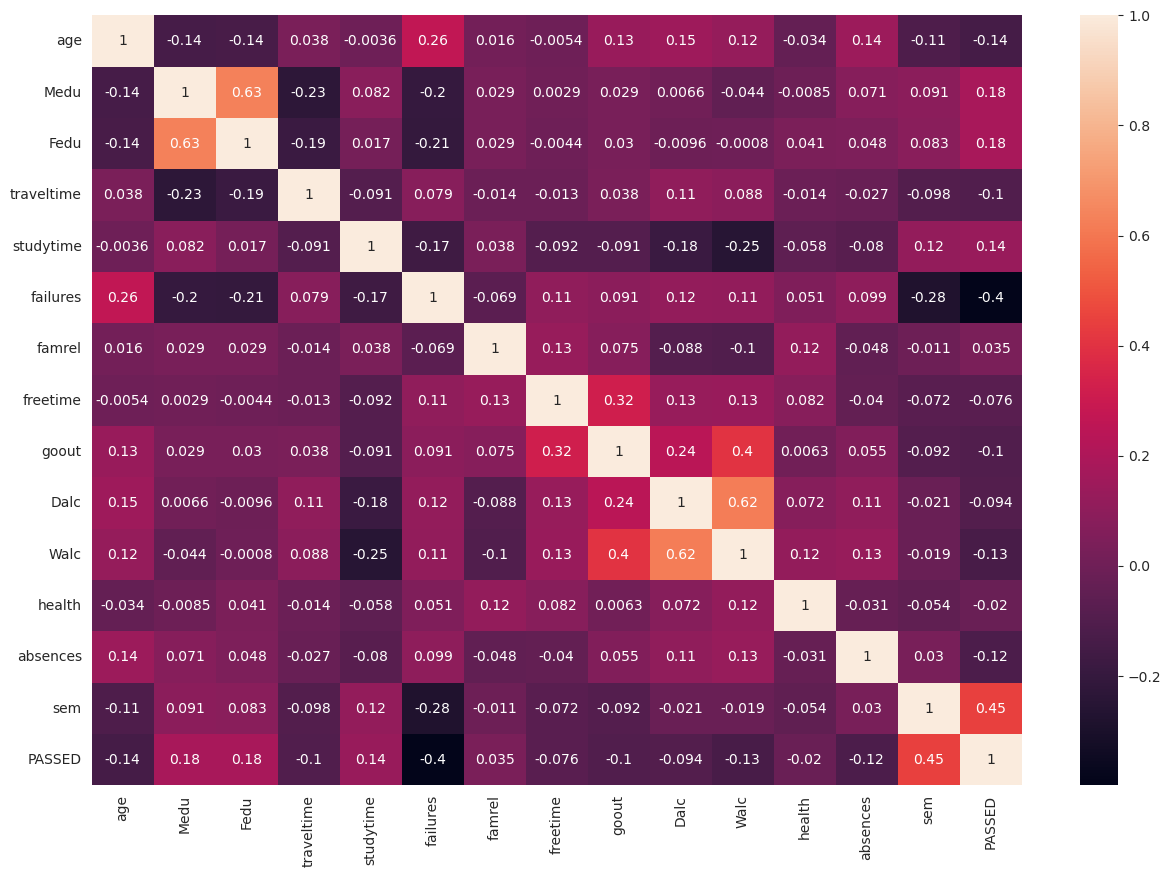

In [10]:
plot = sns.heatmap(df.corr(), annot=True)
plot.figure.set_size_inches(15, 10)

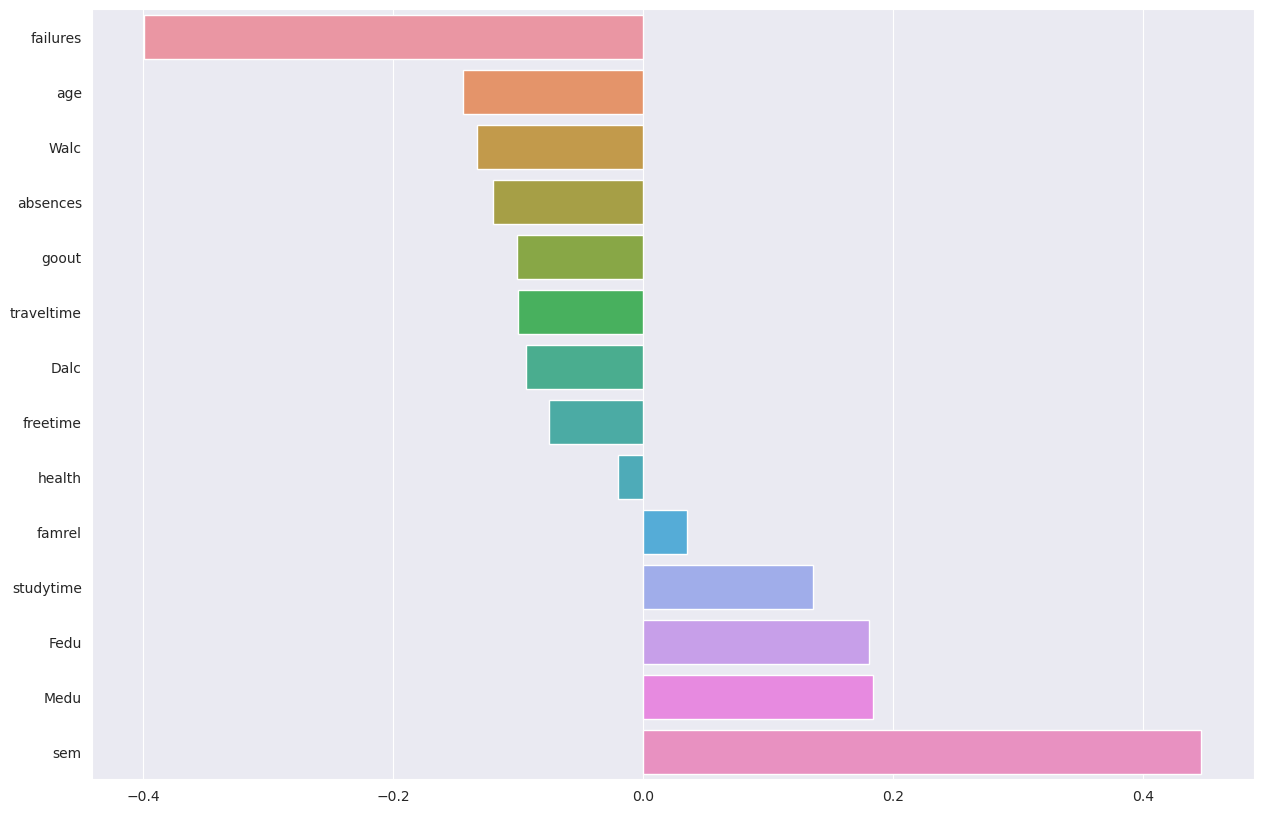

In [11]:
cor = df[numeric_features].corrwith(df.PASSED).sort_values()

plot = sns.barplot(x=cor, y=cor.index)
plot.figure.set_size_inches(15, 10)

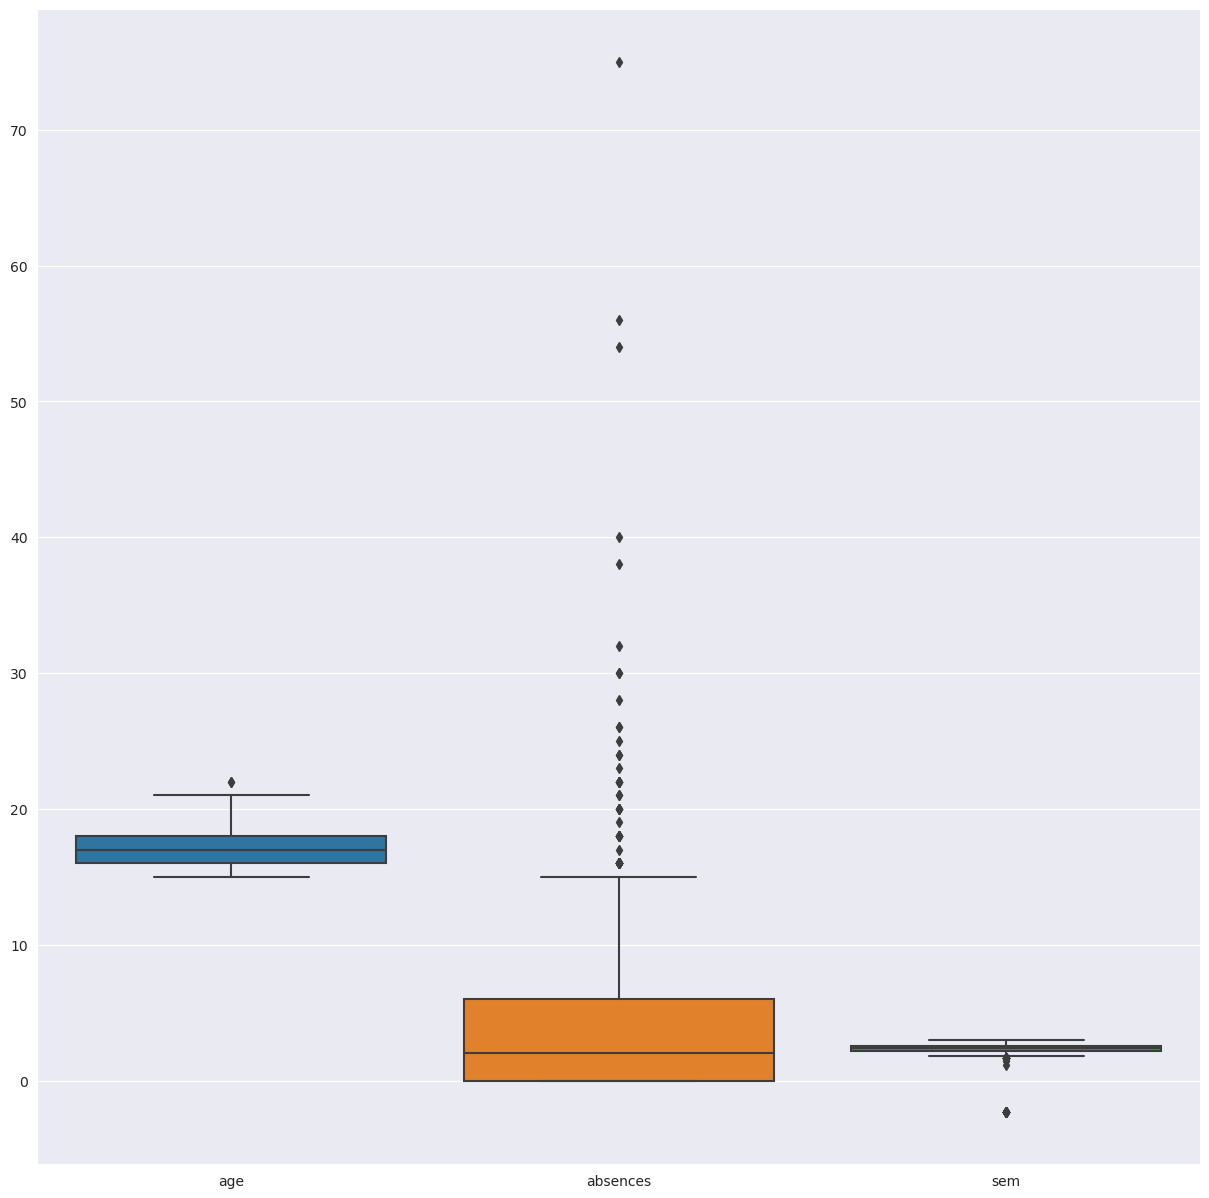

In [12]:
plot = sns.boxplot(data=df[['age', 'absences', 'sem']])
plot.figure.set_size_inches(15, 15)

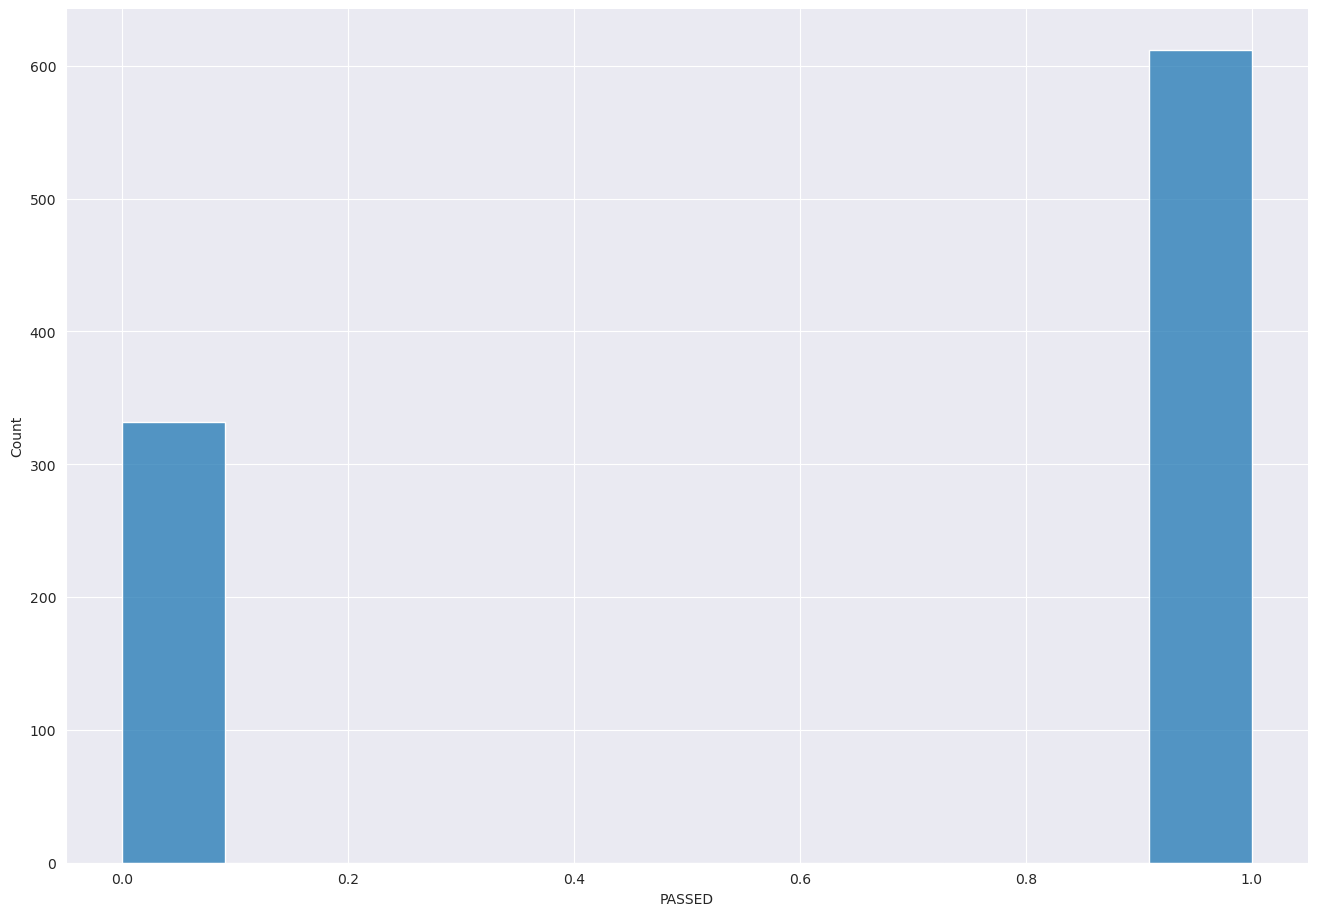

In [13]:
plot = sns.displot(df.PASSED.astype(int))
plot.figure.set_size_inches(15, 10)

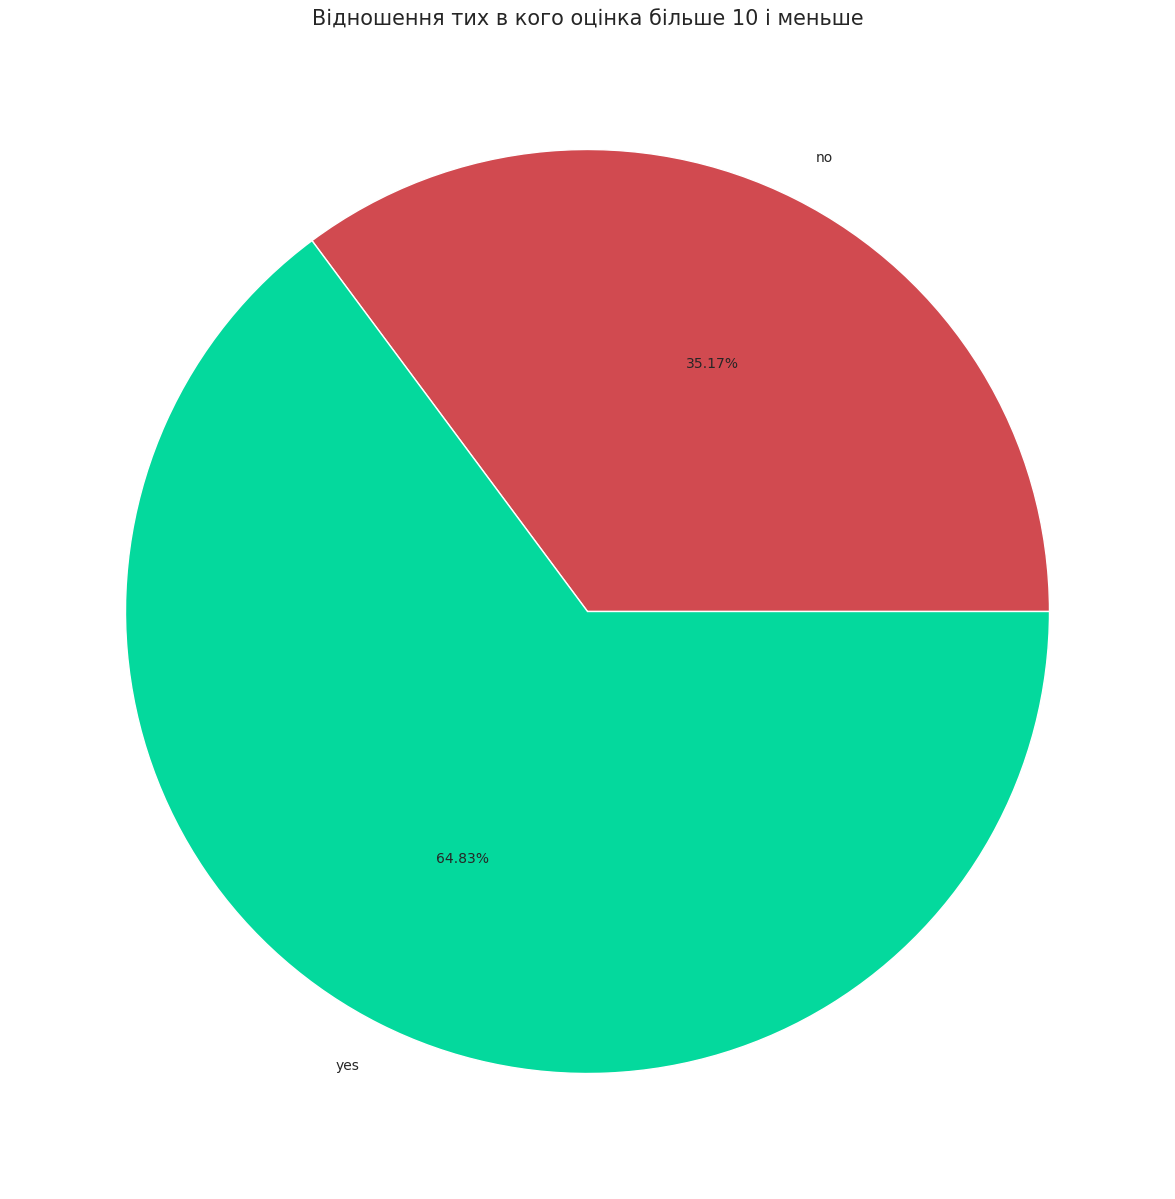

In [14]:
plt.figure(figsize=(20, 15))

plt.pie(df.PASSED.value_counts().sort_index(), autopct = "%1.2f%%", labels=["no", "yes"], colors=["#D14A50", "#04D99D"])
plt.title("Відношення тих в кого оцінка більше 10 і меньше", fontsize=15)
plt.show()

## Завдання 2

[3 бали] 

Навчити модель логістичної регресії (`sklearn.linear_model.LogisticRegression`) лише за числовими ознаками. Дослідити вплив коефіцієнта та типу регуляризації на результат

* Знайти оптимальні параметри коефіцієнта та типу регуляризації (`penalty`, `C`) за допомогою процедури крос-валідації.

* Для всіх моделей знайти середню точність (accuracy) [частку правильних відповідей] на відкладеній вибірці.

* Зробити висновки.

In [15]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df[numeric_features], df.PASSED.astype(int), test_size=0.3, random_state=88)

In [16]:
def score_model(y_train_pred, y_test_pred, y_train, y_test):
    print(f"Mean squared error:\n  test: {mean_squared_error(y_test, y_test_pred, squared=False)}\n  train: {mean_squared_error(y_train, y_train_pred, squared=False)}\n\nPrecision score:\n  test: {precision_score(y_test, y_test_pred)}\n  train: {precision_score(y_train, y_train_pred)}\n\nRecall score:\n  test: {recall_score(y_test, y_test_pred)}\n  train: {recall_score(y_train, y_train_pred)}\n\nF1 score:\n  test: {f1_score(y_test, y_test_pred)}\n  train: {f1_score(y_train, y_train_pred)}\n\nAccuracy score:\n  test: {accuracy_score(y_test, y_test_pred.round())}\n  train: {accuracy_score(y_train, y_train_pred.round())}")

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, precision_recall_curve, f1_score



logistic = LogisticRegression()
logistic.fit(X_train, y_train)

y_test_pred = logistic.predict(X_test)
y_train_pred = logistic.predict(X_train)

score_model(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.360945550105338
  train: 0.35248038845079627

Precision score:
  test: 0.8724489795918368
  train: 0.8779956427015251

Recall score:
  test: 0.9344262295081968
  train: 0.9393939393939394

F1 score:
  test: 0.9023746701846966
  train: 0.9076576576576577

Accuracy score:
  test: 0.8697183098591549
  train: 0.8757575757575757


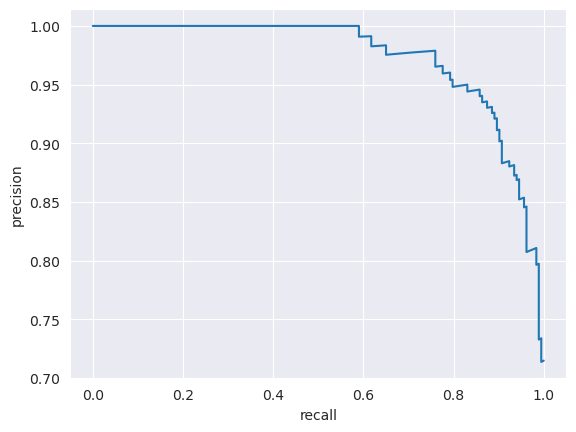

In [18]:
precision, recall, thresholds = precision_recall_curve(y_test, logistic.predict_proba(X_test)[:, 1])
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()


In [19]:
from sklearn.metrics import auc

auc(recall, precision)

0.9730476603978641

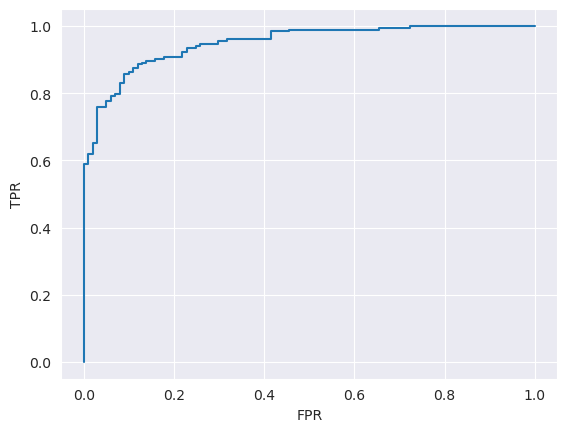

In [20]:
from sklearn.metrics import roc_curve


fpr, tpr, thresholds = roc_curve(y_test, logistic.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [21]:
from sklearn.preprocessing import PolynomialFeatures, KBinsDiscretizer, StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest


column_trans_poly = ColumnTransformer([("scaling", StandardScaler(), numeric_features), ("poly", PolynomialFeatures(degree=3), numeric_features)])

In [22]:
%%time

X = column_trans_poly.fit_transform(df[numeric_features])
y = df.PASSED

param = {"penalty": ['l2', 'l1', 'elasticnet', 'none'], "C": np.logspace(-5, 5, 200)}

searcher = GridSearchCV(LogisticRegression(), param, scoring="accuracy", cv=10)
searcher.fit(X, y)


CPU times: user 9min 17s, sys: 3.37 s, total: 9min 20s
Wall time: 2min 20s


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 1.12266777e-05, 1.26038293e-05, 1.41499130e-05,
       1.58856513e-05, 1.78343088e-05, 2.00220037e-05, 2.24780583e-05,
       2.52353917e-05, 2.83309610e-05, 3.18062569e-05, 3.57078596e-05,
       4.00880633e-05, 4.50055768e-05, 5.05263107e-05, 5.67242607e-05,
       6.36824994e-05, 7.14942899e-05, 8.02643...
       1.10975250e+04, 1.24588336e+04, 1.39871310e+04, 1.57029012e+04,
       1.76291412e+04, 1.97916687e+04, 2.22194686e+04, 2.49450814e+04,
       2.80050389e+04, 3.14403547e+04, 3.52970730e+04, 3.96268864e+04,
       4.44878283e+04, 4.99450512e+04, 5.60716994e+04, 6.29498899e+04,
       7.06718127e+04, 7.93409667e+04, 8.90735464e+04, 1.00000000e+05]),
                         'penalty': ['l2', 'l1', 'elasticnet', 'none']},
             scoring='accuracy')

In [23]:
searcher.best_params_

{'C': 0.3739937302478802, 'penalty': 'l2'}

In [24]:
pipeline_log_poly = Pipeline(steps=[("preprocesing", column_trans_poly), ("estimator", LogisticRegression(**searcher.best_params_, random_state=88))])
pipeline_log_poly.fit(X_train, y_train)

y_test_pred = pipeline_log_poly.predict(X_test)
y_train_pred = pipeline_log_poly.predict(X_train)

score_model(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.411113225896519
  train: 0.3588702812826367

Precision score:
  test: 0.835820895522388
  train: 0.8722943722943723

Recall score:
  test: 0.9180327868852459
  train: 0.9393939393939394

F1 score:
  test: 0.875
  train: 0.904601571268238

Accuracy score:
  test: 0.8309859154929577
  train: 0.8712121212121212


In [25]:
column_trans_kbin = ColumnTransformer([("scaling", StandardScaler(), numeric_features), ("kbin", KBinsDiscretizer(n_bins=18), numeric_features)])

In [26]:
%%time

X = column_trans_kbin.fit_transform(df[numeric_features])

param = {"penalty": ['l2', 'l1', 'elasticnet', 'none'], "C": np.logspace(-5, 5, 200)}

searcher = GridSearchCV(LogisticRegression(), param, scoring="accuracy", cv=10)
searcher.fit(X, y)

CPU times: user 3min 37s, sys: 1.22 s, total: 3min 38s
Wall time: 54.7 s


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 1.12266777e-05, 1.26038293e-05, 1.41499130e-05,
       1.58856513e-05, 1.78343088e-05, 2.00220037e-05, 2.24780583e-05,
       2.52353917e-05, 2.83309610e-05, 3.18062569e-05, 3.57078596e-05,
       4.00880633e-05, 4.50055768e-05, 5.05263107e-05, 5.67242607e-05,
       6.36824994e-05, 7.14942899e-05, 8.02643...
       1.10975250e+04, 1.24588336e+04, 1.39871310e+04, 1.57029012e+04,
       1.76291412e+04, 1.97916687e+04, 2.22194686e+04, 2.49450814e+04,
       2.80050389e+04, 3.14403547e+04, 3.52970730e+04, 3.96268864e+04,
       4.44878283e+04, 4.99450512e+04, 5.60716994e+04, 6.29498899e+04,
       7.06718127e+04, 7.93409667e+04, 8.90735464e+04, 1.00000000e+05]),
                         'penalty': ['l2', 'l1', 'elasticnet', 'none']},
             scoring='accuracy')

In [27]:
searcher.best_params_

{'C': 0.18679135990207846, 'penalty': 'l2'}

In [28]:
pipeline_log_kbin = Pipeline(steps=[("preprocesing", column_trans_kbin), ("estimator", LogisticRegression(**searcher.best_params_, random_state=88))])
pipeline_log_kbin.fit(X_train, y_train)

y_test_pred = pipeline_log_kbin.predict(X_test)
y_train_pred = pipeline_log_kbin.predict(X_train)

score_model(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.34600333793065485
  train: 0.3113995776646092

Precision score:
  test: 0.8941798941798942
  train: 0.9234338747099768

Recall score:
  test: 0.9234972677595629
  train: 0.9277389277389277

F1 score:
  test: 0.9086021505376344
  train: 0.9255813953488372

Accuracy score:
  test: 0.8802816901408451
  train: 0.9030303030303031


In [29]:
column_trans_poly_kbin = ColumnTransformer([("scaling", StandardScaler(), numeric_features), ("poly", PolynomialFeatures(degree=3), numeric_features), ("kbin", KBinsDiscretizer(n_bins=18), numeric_features)])

In [30]:
%%time

X = column_trans_poly_kbin.fit_transform(df[numeric_features])

param = {"penalty": ['l2', 'l1', 'elasticnet', 'none'], "C": np.logspace(-5, 5, 200)}

searcher = GridSearchCV(LogisticRegression(), param, scoring="accuracy", cv=10)
searcher.fit(X, y)

CPU times: user 10min 2s, sys: 3.68 s, total: 10min 6s
Wall time: 2min 32s


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 1.12266777e-05, 1.26038293e-05, 1.41499130e-05,
       1.58856513e-05, 1.78343088e-05, 2.00220037e-05, 2.24780583e-05,
       2.52353917e-05, 2.83309610e-05, 3.18062569e-05, 3.57078596e-05,
       4.00880633e-05, 4.50055768e-05, 5.05263107e-05, 5.67242607e-05,
       6.36824994e-05, 7.14942899e-05, 8.02643...
       1.10975250e+04, 1.24588336e+04, 1.39871310e+04, 1.57029012e+04,
       1.76291412e+04, 1.97916687e+04, 2.22194686e+04, 2.49450814e+04,
       2.80050389e+04, 3.14403547e+04, 3.52970730e+04, 3.96268864e+04,
       4.44878283e+04, 4.99450512e+04, 5.60716994e+04, 6.29498899e+04,
       7.06718127e+04, 7.93409667e+04, 8.90735464e+04, 1.00000000e+05]),
                         'penalty': ['l2', 'l1', 'elasticnet', 'none']},
             scoring='accuracy')

In [31]:
searcher.best_params_

{'C': 24.09403560239527, 'penalty': 'l2'}

In [32]:
pipeline_log_poly_kbin = Pipeline(steps=[("preprocesing", column_trans_poly_kbin), ("estimator", LogisticRegression(**searcher.best_params_, random_state=88))])
pipeline_log_poly_kbin.fit(X_train, y_train)

y_test_pred = pipeline_log_poly_kbin.predict(X_test)
y_train_pred = pipeline_log_poly_kbin.predict(X_train)

score_model(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.41537358036784866
  train: 0.3630677372311974

Precision score:
  test: 0.8316831683168316
  train: 0.8638297872340426

Recall score:
  test: 0.9180327868852459
  train: 0.9463869463869464

F1 score:
  test: 0.8727272727272727
  train: 0.903225806451613

Accuracy score:
  test: 0.8274647887323944
  train: 0.8681818181818182


In [33]:
from sklearn.decomposition import PCA


pca_tmp = PCA(n_components=14)
pca_tmp.fit(df[numeric_features])
pca_tmp.explained_variance_ratio_, pca_tmp.explained_variance_ratio_.sum()

(array([0.74792958, 0.04983031, 0.04134324, 0.03641172, 0.02439408,
        0.02286594, 0.01419845, 0.01327779, 0.01216167, 0.00910897,
        0.00877404, 0.00788412, 0.00646972, 0.00535038]),
 1.0000000000000002)

In [34]:
column_trans_pca = ColumnTransformer([("scaling", StandardScaler(), numeric_features), ("pca", PCA(n_components=3), numeric_features)])

In [35]:
%%time

X = column_trans_pca.fit_transform(df[numeric_features])

param = {"penalty": ['l2', 'l1', 'elasticnet', 'none'], "C": np.logspace(-10, 10, 500)}

searcher = GridSearchCV(LogisticRegression(), param, scoring="accuracy", cv=10)
searcher.fit(X, y)

CPU times: user 3min 40s, sys: 1.46 s, total: 3min 42s
Wall time: 55.7 s


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-10, 1.09668060e-10, 1.20270833e-10, 1.31898690e-10,
       1.44650734e-10, 1.58635653e-10, 1.73972643e-10, 1.90792422e-10,
       2.09238348e-10, 2.29467637e-10, 2.51652705e-10, 2.75982639e-10,
       3.02664806e-10, 3.31926620e-10, 3.64017485e-10, 3.99210913e-10,
       4.37806863e-10, 4.80134292e-10, 5.26553...
       1.73171713e+09, 1.89914058e+09, 2.08275063e+09, 2.28411221e+09,
       2.50494154e+09, 2.74712079e+09, 3.01271407e+09, 3.30398507e+09,
       3.62341632e+09, 3.97373038e+09, 4.35791301e+09, 4.77923865e+09,
       5.24129830e+09, 5.74803016e+09, 6.30375315e+09, 6.91320378e+09,
       7.58157646e+09, 8.31456781e+09, 9.11842520e+09, 1.00000000e+10]),
                         'penalty': ['l2', 'l1', 'elasticnet', 'none']},
             scoring='accuracy')

In [36]:
searcher.best_params_

{'C': 1e-10, 'penalty': 'none'}

In [37]:
%%time

pipeline_log_pca = Pipeline(steps=[("preprocesing", column_trans_pca), ("estimator", LogisticRegression(**searcher.best_params_, random_state=88))])
pipeline_log_pca.fit(X_train, y_train)

y_test_pred = pipeline_log_pca.predict(X_test)
y_train_pred = pipeline_log_pca.predict(X_train)

score_model(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.34600333793065485
  train: 0.3279874350882326

Precision score:
  test: 0.8860103626943006
  train: 0.9013452914798207

Recall score:
  test: 0.9344262295081968
  train: 0.9370629370629371

F1 score:
  test: 0.9095744680851064
  train: 0.9188571428571428

Accuracy score:
  test: 0.8802816901408451
  train: 0.8924242424242425
CPU times: user 79.5 ms, sys: 4 ms, total: 83.5 ms
Wall time: 25 ms


In [38]:
column_trans_kbin_pca = ColumnTransformer([("scaling", StandardScaler(), numeric_features), ("kbin", KBinsDiscretizer(n_bins=18), numeric_features), ("pca", PCA(n_components=3), numeric_features)])

In [39]:
%%time

X = column_trans_kbin_pca.fit_transform(df[numeric_features])

param = {"penalty": ['l2', 'l1', 'elasticnet', 'none'], "C": np.logspace(-10, 10, 500)}

searcher = GridSearchCV(LogisticRegression(), param, scoring="accuracy", cv=10)
searcher.fit(X, y)

CPU times: user 10min 12s, sys: 3.72 s, total: 10min 16s
Wall time: 2min 34s


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-10, 1.09668060e-10, 1.20270833e-10, 1.31898690e-10,
       1.44650734e-10, 1.58635653e-10, 1.73972643e-10, 1.90792422e-10,
       2.09238348e-10, 2.29467637e-10, 2.51652705e-10, 2.75982639e-10,
       3.02664806e-10, 3.31926620e-10, 3.64017485e-10, 3.99210913e-10,
       4.37806863e-10, 4.80134292e-10, 5.26553...
       1.73171713e+09, 1.89914058e+09, 2.08275063e+09, 2.28411221e+09,
       2.50494154e+09, 2.74712079e+09, 3.01271407e+09, 3.30398507e+09,
       3.62341632e+09, 3.97373038e+09, 4.35791301e+09, 4.77923865e+09,
       5.24129830e+09, 5.74803016e+09, 6.30375315e+09, 6.91320378e+09,
       7.58157646e+09, 8.31456781e+09, 9.11842520e+09, 1.00000000e+10]),
                         'penalty': ['l2', 'l1', 'elasticnet', 'none']},
             scoring='accuracy')

In [40]:
searcher.best_params_

{'C': 0.28768540901905854, 'penalty': 'l2'}

In [41]:
pipeline_log_kbin_pca = Pipeline(steps=[("preprocesing", column_trans_kbin_pca), ("estimator", LogisticRegression(**searcher.best_params_, random_state=88))])
pipeline_log_kbin_pca.fit(X_train, y_train)

y_test_pred = pipeline_log_kbin_pca.predict(X_test)
y_train_pred = pipeline_log_kbin_pca.predict(X_train)

score_model(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.3408770791628436
  train: 0.3113995776646092

Precision score:
  test: 0.8947368421052632
  train: 0.9254079254079254

Recall score:
  test: 0.9289617486338798
  train: 0.9254079254079254

F1 score:
  test: 0.9115281501340483
  train: 0.9254079254079254

Accuracy score:
  test: 0.8838028169014085
  train: 0.9030303030303031


In [42]:
column_trans_poly_pca = ColumnTransformer([("scaling", StandardScaler(), numeric_features), ("poly", PolynomialFeatures(degree=4), numeric_features), ("pca", PCA(n_components=4), numeric_features)])

In [43]:
%%time

X = column_trans_poly_pca.fit_transform(df[numeric_features])

param = {"penalty": ['l2', 'l1', 'elasticnet', 'none'], "C": np.logspace(-10, 10, 50)}

searcher = GridSearchCV(LogisticRegression(), param, scoring="accuracy", cv=10)
searcher.fit(X, y)

CPU times: user 22min 38s, sys: 6.6 s, total: 22min 44s
Wall time: 5min 44s


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-10, 2.55954792e-10, 6.55128557e-10, 1.67683294e-09,
       4.29193426e-09, 1.09854114e-08, 2.81176870e-08, 7.19685673e-08,
       1.84206997e-07, 4.71486636e-07, 1.20679264e-06, 3.08884360e-06,
       7.90604321e-06, 2.02358965e-05, 5.17947468e-05, 1.32571137e-04,
       3.39322177e-04, 8.68511374e-04, 2.22299...
       2.68269580e+01, 6.86648845e+01, 1.75751062e+02, 4.49843267e+02,
       1.15139540e+03, 2.94705170e+03, 7.54312006e+03, 1.93069773e+04,
       4.94171336e+04, 1.26485522e+05, 3.23745754e+05, 8.28642773e+05,
       2.12095089e+06, 5.42867544e+06, 1.38949549e+07, 3.55648031e+07,
       9.10298178e+07, 2.32995181e+08, 5.96362332e+08, 1.52641797e+09,
       3.90693994e+09, 1.00000000e+10]),
                         'penalty': ['l2', 'l1', 'elasticnet', 'none']},
             scoring='accuracy')

In [44]:
searcher.best_params_

{'C': 0.0022229964825261957, 'penalty': 'l2'}

In [45]:
pipeline_log_poly_pca = Pipeline(steps=[("preprocesing", column_trans_poly_pca), ("estimator", LogisticRegression(**searcher.best_params_, random_state=88))])
pipeline_log_poly_pca.fit(X_train, y_train)

y_test_pred = pipeline_log_poly_pca.predict(X_test)
y_train_pred = pipeline_log_poly_pca.predict(X_train)

score_model(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.411113225896519
  train: 0.3713203305486893

Precision score:
  test: 0.8260869565217391
  train: 0.8535564853556485

Recall score:
  test: 0.9344262295081968
  train: 0.951048951048951

F1 score:
  test: 0.8769230769230769
  train: 0.8996692392502756

Accuracy score:
  test: 0.8309859154929577
  train: 0.8621212121212121


In [46]:
column_trans_select_k = ColumnTransformer([("scaling", StandardScaler(), numeric_features), ("select_k", SelectKBest(k=3), numeric_features)])

In [47]:
%%time

X = column_trans_select_k.fit_transform(df[numeric_features], df.PASSED)

param = {"penalty": ['l2', 'l1', 'elasticnet', 'none'], "C": np.logspace(-10, 10, 100)}

searcher = GridSearchCV(LogisticRegression(), param, scoring="accuracy", cv=10)
searcher.fit(X, y)

CPU times: user 40.8 s, sys: 240 ms, total: 41.1 s
Wall time: 10.3 s


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-10, 1.59228279e-10, 2.53536449e-10, 4.03701726e-10,
       6.42807312e-10, 1.02353102e-09, 1.62975083e-09, 2.59502421e-09,
       4.13201240e-09, 6.57933225e-09, 1.04761575e-08, 1.66810054e-08,
       2.65608778e-08, 4.22924287e-08, 6.73415066e-08, 1.07226722e-07,
       1.70735265e-07, 2.71858824e-07, 4.32876...
       1.45082878e+06, 2.31012970e+06, 3.67837977e+06, 5.85702082e+06,
       9.32603347e+06, 1.48496826e+07, 2.36448941e+07, 3.76493581e+07,
       5.99484250e+07, 9.54548457e+07, 1.51991108e+08, 2.42012826e+08,
       3.85352859e+08, 6.13590727e+08, 9.77009957e+08, 1.55567614e+09,
       2.47707636e+09, 3.94420606e+09, 6.28029144e+09, 1.00000000e+10]),
                         'penalty': ['l2', 'l1', 'elasticnet', 'none']},
             scoring='accuracy')

In [48]:
searcher.best_params_

{'C': 1e-10, 'penalty': 'none'}

In [49]:
pipeline_log_select_k = Pipeline(steps=[("preprocesing", column_trans_select_k), ("estimator", LogisticRegression(**searcher.best_params_, random_state=88))])
pipeline_log_select_k.fit(X_train, y_train)

y_test_pred = pipeline_log_select_k.predict(X_test)
y_train_pred = pipeline_log_select_k.predict(X_train)

score_model(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.34600333793065485
  train: 0.3279874350882326

Precision score:
  test: 0.8860103626943006
  train: 0.9013452914798207

Recall score:
  test: 0.9344262295081968
  train: 0.9370629370629371

F1 score:
  test: 0.9095744680851064
  train: 0.9188571428571428

Accuracy score:
  test: 0.8802816901408451
  train: 0.8924242424242425


In [50]:
column_trans_poly_select_k = ColumnTransformer([("scaling", StandardScaler(), numeric_features), ("poly", PolynomialFeatures(degree=4), numeric_features), ("select_k", SelectKBest(k=3), numeric_features)])

In [51]:
%%time

X = column_trans_poly_select_k.fit_transform(df[numeric_features], df.PASSED)

param = {"penalty": ['l2', 'l1', 'elasticnet', 'none'], "C": np.logspace(-10, 10, 50)}

searcher = GridSearchCV(LogisticRegression(), param, scoring="accuracy", cv=10)
searcher.fit(X, y)

CPU times: user 22min 8s, sys: 6.75 s, total: 22min 14s
Wall time: 5min 36s


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-10, 2.55954792e-10, 6.55128557e-10, 1.67683294e-09,
       4.29193426e-09, 1.09854114e-08, 2.81176870e-08, 7.19685673e-08,
       1.84206997e-07, 4.71486636e-07, 1.20679264e-06, 3.08884360e-06,
       7.90604321e-06, 2.02358965e-05, 5.17947468e-05, 1.32571137e-04,
       3.39322177e-04, 8.68511374e-04, 2.22299...
       2.68269580e+01, 6.86648845e+01, 1.75751062e+02, 4.49843267e+02,
       1.15139540e+03, 2.94705170e+03, 7.54312006e+03, 1.93069773e+04,
       4.94171336e+04, 1.26485522e+05, 3.23745754e+05, 8.28642773e+05,
       2.12095089e+06, 5.42867544e+06, 1.38949549e+07, 3.55648031e+07,
       9.10298178e+07, 2.32995181e+08, 5.96362332e+08, 1.52641797e+09,
       3.90693994e+09, 1.00000000e+10]),
                         'penalty': ['l2', 'l1', 'elasticnet', 'none']},
             scoring='accuracy')

In [52]:
searcher.best_params_

{'C': 26.826957952797272, 'penalty': 'l2'}

In [53]:
pipeline_log_poly_select_k = Pipeline(steps=[("preprocesing", column_trans_poly_select_k), ("estimator", LogisticRegression(**searcher.best_params_, random_state=88))])
pipeline_log_poly_select_k.fit(X_train, y_train)

y_test_pred = pipeline_log_poly_select_k.predict(X_test)
y_train_pred = pipeline_log_poly_select_k.predict(X_train)

score_model(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.4024572411895648
  train: 0.3713203305486893

Precision score:
  test: 0.8309178743961353
  train: 0.8535564853556485

Recall score:
  test: 0.9398907103825137
  train: 0.951048951048951

F1 score:
  test: 0.8820512820512821
  train: 0.8996692392502756

Accuracy score:
  test: 0.8380281690140845
  train: 0.8621212121212121


In [54]:
column_trans_kbin_select_k = ColumnTransformer([("scaling", StandardScaler(), numeric_features), ("kbin", KBinsDiscretizer(n_bins=18), numeric_features), ("select_k", SelectKBest(k=3), numeric_features)])

In [55]:
%%time

X = column_trans_kbin_select_k.fit_transform(df[numeric_features], df.PASSED)

param = {"penalty": ['l2', 'l1', 'elasticnet', 'none'], "C": np.logspace(-10, 10, 100)}

searcher = GridSearchCV(LogisticRegression(), param, scoring="accuracy", cv=10)
searcher.fit(X, y)

CPU times: user 2min 16s, sys: 836 ms, total: 2min 17s
Wall time: 34.5 s


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-10, 1.59228279e-10, 2.53536449e-10, 4.03701726e-10,
       6.42807312e-10, 1.02353102e-09, 1.62975083e-09, 2.59502421e-09,
       4.13201240e-09, 6.57933225e-09, 1.04761575e-08, 1.66810054e-08,
       2.65608778e-08, 4.22924287e-08, 6.73415066e-08, 1.07226722e-07,
       1.70735265e-07, 2.71858824e-07, 4.32876...
       1.45082878e+06, 2.31012970e+06, 3.67837977e+06, 5.85702082e+06,
       9.32603347e+06, 1.48496826e+07, 2.36448941e+07, 3.76493581e+07,
       5.99484250e+07, 9.54548457e+07, 1.51991108e+08, 2.42012826e+08,
       3.85352859e+08, 6.13590727e+08, 9.77009957e+08, 1.55567614e+09,
       2.47707636e+09, 3.94420606e+09, 6.28029144e+09, 1.00000000e+10]),
                         'penalty': ['l2', 'l1', 'elasticnet', 'none']},
             scoring='accuracy')

In [56]:
searcher.best_params_

{'C': 0.19630406500402683, 'penalty': 'l2'}

In [57]:
pipeline_log_kbin_select_k = Pipeline(steps=[("preprocesing", column_trans_kbin_select_k), ("estimator", LogisticRegression(**searcher.best_params_, random_state=88))])
pipeline_log_kbin_select_k.fit(X_train, y_train)

y_test_pred = pipeline_log_kbin_select_k.predict(X_test)
y_train_pred = pipeline_log_kbin_select_k.predict(X_train)

score_model(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.3408770791628436
  train: 0.3138229572304239

Precision score:
  test: 0.8947368421052632
  train: 0.9232558139534883

Recall score:
  test: 0.9289617486338798
  train: 0.9254079254079254

F1 score:
  test: 0.9115281501340483
  train: 0.9243306169965076

Accuracy score:
  test: 0.8838028169014085
  train: 0.9015151515151515


## Завдання 3

[6 балів] 

Навчити модель яка розв'язує задачу двокласової класифікації з використанням усіх ознак.
Використати `sklearn.linear_model.LogisticRegression(solver='saga')` та `sklearn.linear_model.SGDClassifier(loss='log_loss')`.

* Здійснити пошук оптимальних гіперпараметрів моделі використовуючи `GridSearchCV`
    * (`penalty`, `C`) для `LogisticRegression(solver='saga')`
    * (`penalty`, `alpha`, `l1_ratio`, `max_iter`, `learning_rate`) для `SGDClassifier(loss='log_loss')`
* Мета -- отримати якомога кращий результат. 
* Оцінити точність (precision), повноту (recall), F-міру (F1-score), AUC-ROC використовуючи функції з модуля `sklearn.metrics`. 
* Зобразити криві ROC та Precision-Recall для найкращої моделі. 
* Зробити висновки.
    

In [58]:
X_train, X_test, y_train, y_test = train_test_split(df, df.PASSED.astype(int), test_size=0.3, random_state=88)

In [59]:
column_trans_base = ColumnTransformer([("scaling", StandardScaler(), my_num_features), ("ohe", OneHotEncoder(), my_cat_features)])

In [60]:
logistic_2_tmp = Pipeline(steps=[("preprocesing", column_trans_base), ("estimator", LogisticRegression(solver="saga"))])
logistic_2_tmp.fit(X_train, y_train)

y_test_pred = logistic_2_tmp.predict(X_test)
y_train_pred = logistic_2_tmp.predict(X_train)

score_model(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.39805866932570644
  train: 0.3138229572304239

Precision score:
  test: 0.8349514563106796
  train: 0.9044444444444445

Recall score:
  test: 0.9398907103825137
  train: 0.9487179487179487

F1 score:
  test: 0.884318766066838
  train: 0.926052332195677

Accuracy score:
  test: 0.8415492957746479
  train: 0.9015151515151515


In [61]:
from sklearn.linear_model import SGDClassifier


sgdclas_tmp = Pipeline(steps=[("preprocesing", column_trans_base), ("estimator", SGDClassifier(loss='log'))])
sgdclas_tmp.fit(X_train, y_train)

y_test_pred = sgdclas_tmp.predict(X_test)
y_train_pred = sgdclas_tmp.predict(X_train)

score_model(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.411113225896519
  train: 0.35032452487268534

Precision score:
  test: 0.813953488372093
  train: 0.8670886075949367

Recall score:
  test: 0.9562841530054644
  train: 0.958041958041958

F1 score:
  test: 0.879396984924623
  train: 0.910299003322259

Accuracy score:
  test: 0.8309859154929577
  train: 0.8772727272727273


In [62]:
from sklearn.svm import SVC


svm_tmp = Pipeline(steps=[("preprocesing", column_trans_base), ("estimator", SVC())])
svm_tmp.fit(X_train, y_train)

y_test_pred = svm_tmp.predict(X_test)
y_train_pred = svm_tmp.predict(X_train)

score_model(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.4279002121398116
  train: 0.21672493389016634

Precision score:
  test: 0.8133971291866029
  train: 0.9461883408071748

Recall score:
  test: 0.9289617486338798
  train: 0.9836829836829837

F1 score:
  test: 0.8673469387755102
  train: 0.9645714285714285

Accuracy score:
  test: 0.8169014084507042
  train: 0.953030303030303


In [63]:
%%time

X = column_trans_base.fit_transform(df)
y = df.PASSED


param = {"penalty": ['l2', 'l1', 'elasticnet', 'none'], "C": np.logspace(-10, 10, 100)}

searcher = GridSearchCV(LogisticRegression(), param, scoring="accuracy", cv=10)
searcher.fit(X, y)

CPU times: user 1min 59s, sys: 708 ms, total: 1min 59s
Wall time: 30.1 s


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-10, 1.59228279e-10, 2.53536449e-10, 4.03701726e-10,
       6.42807312e-10, 1.02353102e-09, 1.62975083e-09, 2.59502421e-09,
       4.13201240e-09, 6.57933225e-09, 1.04761575e-08, 1.66810054e-08,
       2.65608778e-08, 4.22924287e-08, 6.73415066e-08, 1.07226722e-07,
       1.70735265e-07, 2.71858824e-07, 4.32876...
       1.45082878e+06, 2.31012970e+06, 3.67837977e+06, 5.85702082e+06,
       9.32603347e+06, 1.48496826e+07, 2.36448941e+07, 3.76493581e+07,
       5.99484250e+07, 9.54548457e+07, 1.51991108e+08, 2.42012826e+08,
       3.85352859e+08, 6.13590727e+08, 9.77009957e+08, 1.55567614e+09,
       2.47707636e+09, 3.94420606e+09, 6.28029144e+09, 1.00000000e+10]),
                         'penalty': ['l2', 'l1', 'elasticnet', 'none']},
             scoring='accuracy')

In [64]:
searcher.best_params_

{'C': 1e-10, 'penalty': 'none'}

In [65]:
logistic_2 = Pipeline(steps=[("preprocesing", column_trans_base), ("estimator", LogisticRegression(**searcher.best_params_, solver="saga", random_state=88))])
logistic_2.fit(X_train, y_train)

y_test_pred = logistic_2.predict(X_test)
y_train_pred = logistic_2.predict(X_train)

score_model(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.37995552000609045
  train: 0.30151134457776363

Precision score:
  test: 0.8480392156862745
  train: 0.9164785553047404

Recall score:
  test: 0.9453551912568307
  train: 0.9463869463869464

F1 score:
  test: 0.8940568475452196
  train: 0.9311926605504588

Accuracy score:
  test: 0.8556338028169014
  train: 0.9090909090909091


In [66]:
%%time


param = {"penalty": ['l2', 'l1', 'elasticnet'], "alpha": np.logspace(-10, 10, 100), "learning_rate": ["constant", "optimal", "invscaling", "adaptive"]}

searcher = GridSearchCV(SGDClassifier(loss="log"), param, scoring="accuracy", cv=10)
searcher.fit(X, y)

CPU times: user 27.9 s, sys: 20 ms, total: 27.9 s
Wall time: 27.9 s


GridSearchCV(cv=10, estimator=SGDClassifier(loss='log'),
             param_grid={'alpha': array([1.00000000e-10, 1.59228279e-10, 2.53536449e-10, 4.03701726e-10,
       6.42807312e-10, 1.02353102e-09, 1.62975083e-09, 2.59502421e-09,
       4.13201240e-09, 6.57933225e-09, 1.04761575e-08, 1.66810054e-08,
       2.65608778e-08, 4.22924287e-08, 6.73415066e-08, 1.07226722e-07,
       1.70735265e-07, 2.71858824e-0...
       9.32603347e+06, 1.48496826e+07, 2.36448941e+07, 3.76493581e+07,
       5.99484250e+07, 9.54548457e+07, 1.51991108e+08, 2.42012826e+08,
       3.85352859e+08, 6.13590727e+08, 9.77009957e+08, 1.55567614e+09,
       2.47707636e+09, 3.94420606e+09, 6.28029144e+09, 1.00000000e+10]),
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='accuracy')

In [67]:
searcher.best_params_

{'alpha': 0.019179102616724848, 'learning_rate': 'optimal', 'penalty': 'l1'}

In [68]:
sgdclas = Pipeline(steps=[("preprocesing", column_trans_base), ("estimator", SGDClassifier(**searcher.best_params_, loss="log", random_state=88))])
sgdclas.fit(X_train, y_train)

y_test_pred = sgdclas.predict(X_test)
y_train_pred = sgdclas.predict(X_train)

score_model(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.31399291281137964
  train: 0.3279874350882326

Precision score:
  test: 0.9015544041450777
  train: 0.9124423963133641

Recall score:
  test: 0.9508196721311475
  train: 0.9230769230769231

F1 score:
  test: 0.9255319148936171
  train: 0.9177288528389339

Accuracy score:
  test: 0.9014084507042254
  train: 0.8924242424242425


In [69]:
%%time


param = {"kernel": ['linear', 'poly', 'rbf', 'sigmoid'], "C": np.logspace(-3, 3, 25)}

searcher = GridSearchCV(SVC(), param, scoring="accuracy", cv=10)
searcher.fit(X, y)

CPU times: user 10min 8s, sys: 479 µs, total: 10min 8s
Wall time: 10min 8s


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 1.77827941e-03, 3.16227766e-03, 5.62341325e-03,
       1.00000000e-02, 1.77827941e-02, 3.16227766e-02, 5.62341325e-02,
       1.00000000e-01, 1.77827941e-01, 3.16227766e-01, 5.62341325e-01,
       1.00000000e+00, 1.77827941e+00, 3.16227766e+00, 5.62341325e+00,
       1.00000000e+01, 1.77827941e+01, 3.16227766e+01, 5.62341325e+01,
       1.00000000e+02, 1.77827941e+02, 3.16227766e+02, 5.62341325e+02,
       1.00000000e+03]),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [70]:
searcher.best_params_

{'C': 1.0, 'kernel': 'linear'}

In [71]:
svm = Pipeline(steps=[("preprocesing", column_trans_base), ("estimator", SVC(**searcher.best_params_, random_state=88))])
svm.fit(X_train, y_train)

y_test_pred = svm.predict(X_test)
y_train_pred = svm.predict(X_train)

score_model(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.37995552000609045
  train: 0.29898819273332417

Precision score:
  test: 0.855
  train: 0.9223744292237442

Recall score:
  test: 0.9344262295081968
  train: 0.9417249417249417

F1 score:
  test: 0.8929503916449086
  train: 0.9319492502883506

Accuracy score:
  test: 0.8556338028169014
  train: 0.9106060606060606


In [72]:
column_trans_kbin = ColumnTransformer([("scaling", StandardScaler(), my_num_features), ("ohe", OneHotEncoder(), my_cat_features), ("kbin", KBinsDiscretizer(n_bins=18), my_num_features)])

In [73]:
%%time


X = column_trans_kbin.fit_transform(df.drop("PASSED", axis=1))

param = {"penalty": ['l2', 'l1', 'elasticnet', 'none'], "C": np.logspace(-10, 10, 100)}

searcher = GridSearchCV(LogisticRegression(), param, scoring="accuracy", cv=10)
searcher.fit(X, y)

CPU times: user 42.5 s, sys: 24 ms, total: 42.5 s
Wall time: 42.5 s


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-10, 1.59228279e-10, 2.53536449e-10, 4.03701726e-10,
       6.42807312e-10, 1.02353102e-09, 1.62975083e-09, 2.59502421e-09,
       4.13201240e-09, 6.57933225e-09, 1.04761575e-08, 1.66810054e-08,
       2.65608778e-08, 4.22924287e-08, 6.73415066e-08, 1.07226722e-07,
       1.70735265e-07, 2.71858824e-07, 4.32876...
       1.45082878e+06, 2.31012970e+06, 3.67837977e+06, 5.85702082e+06,
       9.32603347e+06, 1.48496826e+07, 2.36448941e+07, 3.76493581e+07,
       5.99484250e+07, 9.54548457e+07, 1.51991108e+08, 2.42012826e+08,
       3.85352859e+08, 6.13590727e+08, 9.77009957e+08, 1.55567614e+09,
       2.47707636e+09, 3.94420606e+09, 6.28029144e+09, 1.00000000e+10]),
                         'penalty': ['l2', 'l1', 'elasticnet', 'none']},
             scoring='accuracy')

In [74]:
searcher.best_params_

{'C': 0.31257158496882353, 'penalty': 'l2'}

In [75]:
logistic_kbin = Pipeline(steps=[("preprocesing", column_trans_kbin), ("estimator", LogisticRegression(**searcher.best_params_, solver="saga", random_state=88))])
logistic_kbin.fit(X_train, y_train)

y_test_pred = logistic_kbin.predict(X_test)
y_train_pred = logistic_kbin.predict(X_train)

score_model(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.34600333793065485
  train: 0.30151134457776363

Precision score:
  test: 0.8900523560209425
  train: 0.9280742459396751

Recall score:
  test: 0.9289617486338798
  train: 0.9324009324009324

F1 score:
  test: 0.9090909090909092
  train: 0.9302325581395349

Accuracy score:
  test: 0.8802816901408451
  train: 0.9090909090909091


In [76]:
%%time


param = {"penalty": ['l2', 'l1', 'elasticnet'], "alpha": np.logspace(-10, 10, 100), "learning_rate": ["constant", "optimal", "invscaling", "adaptive"]}

searcher = GridSearchCV(SGDClassifier(loss="log"), param, scoring="accuracy", cv=10)
searcher.fit(X, y)

CPU times: user 19 s, sys: 44 ms, total: 19 s
Wall time: 19 s


GridSearchCV(cv=10, estimator=SGDClassifier(loss='log'),
             param_grid={'alpha': array([1.00000000e-10, 1.59228279e-10, 2.53536449e-10, 4.03701726e-10,
       6.42807312e-10, 1.02353102e-09, 1.62975083e-09, 2.59502421e-09,
       4.13201240e-09, 6.57933225e-09, 1.04761575e-08, 1.66810054e-08,
       2.65608778e-08, 4.22924287e-08, 6.73415066e-08, 1.07226722e-07,
       1.70735265e-07, 2.71858824e-0...
       9.32603347e+06, 1.48496826e+07, 2.36448941e+07, 3.76493581e+07,
       5.99484250e+07, 9.54548457e+07, 1.51991108e+08, 2.42012826e+08,
       3.85352859e+08, 6.13590727e+08, 9.77009957e+08, 1.55567614e+09,
       2.47707636e+09, 3.94420606e+09, 6.28029144e+09, 1.00000000e+10]),
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='accuracy')

In [77]:
searcher.best_params_

{'alpha': 0.012045035402587835, 'learning_rate': 'optimal', 'penalty': 'l1'}

In [78]:
sgdclas_kbin = Pipeline(steps=[("preprocesing", column_trans_kbin), ("estimator", SGDClassifier(**searcher.best_params_, loss="log", random_state=88))])
sgdclas_kbin.fit(X_train, y_train)

y_test_pred = sgdclas_kbin.predict(X_test)
y_train_pred = sgdclas_kbin.predict(X_train)

score_model(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.3250135425130796
  train: 0.3186144245246149

Precision score:
  test: 0.9180327868852459
  train: 0.9268867924528302

Recall score:
  test: 0.9180327868852459
  train: 0.916083916083916

F1 score:
  test: 0.9180327868852459
  train: 0.921453692848769

Accuracy score:
  test: 0.8943661971830986
  train: 0.8984848484848484


In [79]:
svm_kbin_tmp = Pipeline(steps=[("preprocesing", column_trans_kbin), ("estimator", SVC(random_state=88))])
svm_kbin_tmp.fit(X_train, y_train)

y_test_pred = svm_kbin_tmp.predict(X_test)
y_train_pred = svm_kbin_tmp.predict(X_train)

score_model(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.3408770791628436
  train: 0.2640018365409031

Precision score:
  test: 0.8947368421052632
  train: 0.9570405727923628

Recall score:
  test: 0.9289617486338798
  train: 0.9347319347319347

F1 score:
  test: 0.9115281501340483
  train: 0.9457547169811321

Accuracy score:
  test: 0.8838028169014085
  train: 0.9303030303030303


In [80]:
%%time


X = SelectKBest(k=6).fit_transform(column_trans_kbin.fit_transform(df.drop("PASSED", axis=1)), df.PASSED)

param = {"penalty": ['l2', 'l1', 'elasticnet', 'none'], "C": np.logspace(-10, 10, 100)}

searcher = GridSearchCV(LogisticRegression(), param, scoring="accuracy", cv=10)
searcher.fit(X, y)

CPU times: user 11.4 s, sys: 24 ms, total: 11.5 s
Wall time: 11.5 s


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-10, 1.59228279e-10, 2.53536449e-10, 4.03701726e-10,
       6.42807312e-10, 1.02353102e-09, 1.62975083e-09, 2.59502421e-09,
       4.13201240e-09, 6.57933225e-09, 1.04761575e-08, 1.66810054e-08,
       2.65608778e-08, 4.22924287e-08, 6.73415066e-08, 1.07226722e-07,
       1.70735265e-07, 2.71858824e-07, 4.32876...
       1.45082878e+06, 2.31012970e+06, 3.67837977e+06, 5.85702082e+06,
       9.32603347e+06, 1.48496826e+07, 2.36448941e+07, 3.76493581e+07,
       5.99484250e+07, 9.54548457e+07, 1.51991108e+08, 2.42012826e+08,
       3.85352859e+08, 6.13590727e+08, 9.77009957e+08, 1.55567614e+09,
       2.47707636e+09, 3.94420606e+09, 6.28029144e+09, 1.00000000e+10]),
                         'penalty': ['l2', 'l1', 'elasticnet', 'none']},
             scoring='accuracy')

In [81]:
searcher.best_params_

{'C': 8.111308307896856, 'penalty': 'l2'}

In [82]:
logistic_kbin_select_k = Pipeline(steps=[("preprocesing", column_trans_kbin), ("select_k", SelectKBest(k=6)), ("estimator", LogisticRegression(**searcher.best_params_, solver="saga", random_state=88))])
logistic_kbin_select_k.fit(X_train, y_train)

y_test_pred = logistic_kbin_select_k.predict(X_test)
y_train_pred = logistic_kbin_select_k.predict(X_train)

score_model(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.31955074097291347
  train: 0.3233348953414316

Precision score:
  test: 0.9010416666666666
  train: 0.9166666666666666

Recall score:
  test: 0.9453551912568307
  train: 0.9230769230769231

F1 score:
  test: 0.9226666666666667
  train: 0.9198606271777002

Accuracy score:
  test: 0.897887323943662
  train: 0.8954545454545455


In [83]:
%%time


param = {"penalty": ['l2', 'l1', 'elasticnet'], "alpha": np.logspace(-10, 10, 100), "learning_rate": ["constant", "optimal", "invscaling", "adaptive"]}

searcher = GridSearchCV(SGDClassifier(loss="log"), param, scoring="accuracy", cv=10)
searcher.fit(X, y)

CPU times: user 10.7 s, sys: 19.9 ms, total: 10.7 s
Wall time: 10.7 s


GridSearchCV(cv=10, estimator=SGDClassifier(loss='log'),
             param_grid={'alpha': array([1.00000000e-10, 1.59228279e-10, 2.53536449e-10, 4.03701726e-10,
       6.42807312e-10, 1.02353102e-09, 1.62975083e-09, 2.59502421e-09,
       4.13201240e-09, 6.57933225e-09, 1.04761575e-08, 1.66810054e-08,
       2.65608778e-08, 4.22924287e-08, 6.73415066e-08, 1.07226722e-07,
       1.70735265e-07, 2.71858824e-0...
       9.32603347e+06, 1.48496826e+07, 2.36448941e+07, 3.76493581e+07,
       5.99484250e+07, 9.54548457e+07, 1.51991108e+08, 2.42012826e+08,
       3.85352859e+08, 6.13590727e+08, 9.77009957e+08, 1.55567614e+09,
       2.47707636e+09, 3.94420606e+09, 6.28029144e+09, 1.00000000e+10]),
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='accuracy')

In [84]:
searcher.best_params_

{'alpha': 4.534878508128582e-05, 'learning_rate': 'optimal', 'penalty': 'l1'}

In [85]:
sgdclas_kbin_select_k = Pipeline(steps=[("preprocesing", column_trans_kbin), ("select_k", SelectKBest(k=6)), ("estimator", SGDClassifier(**searcher.best_params_, loss="log", random_state=88))])
sgdclas_kbin_select_k.fit(X_train, y_train)

y_test_pred = sgdclas_kbin_select_k.predict(X_test)
y_train_pred = sgdclas_kbin_select_k.predict(X_train)

score_model(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.411113225896519
  train: 0.3872983346207417

Precision score:
  test: 0.8229665071770335
  train: 0.8556034482758621

Recall score:
  test: 0.9398907103825137
  train: 0.9254079254079254

F1 score:
  test: 0.8775510204081632
  train: 0.8891377379619262

Accuracy score:
  test: 0.8309859154929577
  train: 0.85


In [86]:
svm_kbin_select_k_tmp = Pipeline(steps=[("preprocesing", column_trans_kbin), ("select_k", SelectKBest(k=6)), ("estimator", SVC(random_state=88))])
svm_kbin_select_k_tmp.fit(X_train, y_train)

y_test_pred = svm_kbin_select_k_tmp.predict(X_test)
y_train_pred = svm_kbin_select_k_tmp.predict(X_train)

score_model(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.31399291281137964
  train: 0.3279874350882326

Precision score:
  test: 0.9015544041450777
  train: 0.9124423963133641

Recall score:
  test: 0.9508196721311475
  train: 0.9230769230769231

F1 score:
  test: 0.9255319148936171
  train: 0.9177288528389339

Accuracy score:
  test: 0.9014084507042254
  train: 0.8924242424242425


In [87]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits = 10, train_size=0.8, random_state=88)
quals = []
svm_kbin_select_k_sss_tmp = Pipeline(steps=[("preprocesing", column_trans_kbin), ("select_k", SelectKBest(k=6)), ("estimator", SVC(random_state=88))])

for tr_ind, test_ind in sss.split(X_train, y_train):
    svm_kbin_select_k_sss_tmp.fit(X_train.iloc[tr_ind], y_train.iloc[tr_ind])
    quals.append(accuracy_score(y_train.iloc[test_ind], svm_kbin_select_k_sss_tmp.predict(X_train.iloc[test_ind])))

print("accuracy_score with stratification = ", np.mean(quals))
print("accuracy_score std with stratification = ", np.std(quals))

accuracy_score with stratification =  0.8696969696969697
accuracy_score std with stratification =  0.02575757575757576


In [88]:
from sklearn.decomposition import TruncatedSVD

X = column_trans_kbin.fit_transform(df.drop("PASSED", axis=1))

truncated_tmp = TruncatedSVD(n_components=83)
truncated_tmp.fit(X)
truncated_tmp.explained_variance_ratio_.sum(), X.shape

(0.9938051797100225, (944, 122))

In [89]:
logistic_3_tmp = Pipeline(steps=[("preprocesing", column_trans_kbin), ("TruncatedSVD", TruncatedSVD(n_components=83)), ("estimator", LogisticRegression(solver="saga", random_state=88))])
logistic_3_tmp.fit(X_train, y_train)

y_test_pred = logistic_3_tmp.predict(X_test)
y_train_pred = logistic_3_tmp.predict(X_train)

score_model(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.37529331252040077
  train: 0.29387690682262935

Precision score:
  test: 0.8823529411764706
  train: 0.9366197183098591

Recall score:
  test: 0.9016393442622951
  train: 0.9300699300699301

F1 score:
  test: 0.891891891891892
  train: 0.9333333333333333

Accuracy score:
  test: 0.8591549295774648
  train: 0.9136363636363637


In [90]:
sgdclas_2_tmp = Pipeline(steps=[("preprocesing", column_trans_kbin), ("TruncatedSVD", TruncatedSVD(n_components=83)), ("estimator", SGDClassifier(loss='log', random_state=88))])
sgdclas_2_tmp.fit(X_train, y_train)

y_test_pred = sgdclas_2_tmp.predict(X_test)
y_train_pred = sgdclas_2_tmp.predict(X_train)

score_model(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.40680825673341353
  train: 0.31622776601683794

Precision score:
  test: 0.84
  train: 0.9006622516556292

Recall score:
  test: 0.9180327868852459
  train: 0.951048951048951

F1 score:
  test: 0.877284595300261
  train: 0.925170068027211

Accuracy score:
  test: 0.8345070422535211
  train: 0.9


In [91]:
svm_2_tmp = Pipeline(steps=[("preprocesing", column_trans_kbin), ("TruncatedSVD", TruncatedSVD(n_components=83)), ("estimator", SVC(random_state=88))])
svm_2_tmp.fit(X_train, y_train)

y_test_pred = svm_2_tmp.predict(X_test)
y_train_pred = svm_2_tmp.predict(X_train)

score_model(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.31955074097291347
  train: 0.29128763250176765

Precision score:
  test: 0.9010416666666666
  train: 0.9408983451536643

Recall score:
  test: 0.9453551912568307
  train: 0.9277389277389277

F1 score:
  test: 0.9226666666666667
  train: 0.9342723004694836

Accuracy score:
  test: 0.897887323943662
  train: 0.9151515151515152


In [92]:
%%time


X = TruncatedSVD(n_components=83).fit_transform(column_trans_kbin.fit_transform(df.drop("PASSED", axis=1)))


param = {"penalty": ['l2', 'l1', 'elasticnet'], "alpha": np.logspace(-10, 10, 100), "learning_rate": ["constant", "optimal", "invscaling", "adaptive"]}

searcher = GridSearchCV(SGDClassifier(loss="log"), param, scoring="accuracy", cv=10)
searcher.fit(X, y)

CPU times: user 25.5 s, sys: 20 ms, total: 25.6 s
Wall time: 25.5 s


GridSearchCV(cv=10, estimator=SGDClassifier(loss='log'),
             param_grid={'alpha': array([1.00000000e-10, 1.59228279e-10, 2.53536449e-10, 4.03701726e-10,
       6.42807312e-10, 1.02353102e-09, 1.62975083e-09, 2.59502421e-09,
       4.13201240e-09, 6.57933225e-09, 1.04761575e-08, 1.66810054e-08,
       2.65608778e-08, 4.22924287e-08, 6.73415066e-08, 1.07226722e-07,
       1.70735265e-07, 2.71858824e-0...
       9.32603347e+06, 1.48496826e+07, 2.36448941e+07, 3.76493581e+07,
       5.99484250e+07, 9.54548457e+07, 1.51991108e+08, 2.42012826e+08,
       3.85352859e+08, 6.13590727e+08, 9.77009957e+08, 1.55567614e+09,
       2.47707636e+09, 3.94420606e+09, 6.28029144e+09, 1.00000000e+10]),
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='accuracy')

In [93]:
searcher.best_params_

{'alpha': 0.0011768119524349992,
 'learning_rate': 'optimal',
 'penalty': 'elasticnet'}

In [94]:
sgdclas_kbin_trunc = Pipeline(steps=[("preprocesing", column_trans_kbin), ("TruncatedSVD", TruncatedSVD(n_components=83)), ("estimator", SGDClassifier(**searcher.best_params_, loss="log", random_state=88))])
sgdclas_kbin_trunc.fit(X_train, y_train)

y_test_pred = sgdclas_kbin_trunc.predict(X_test)
y_train_pred = sgdclas_kbin_trunc.predict(X_train)

score_model(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.38456120961904355
  train: 0.29898819273332417

Precision score:
  test: 0.9075144508670521
  train: 0.9768041237113402

Recall score:
  test: 0.8579234972677595
  train: 0.8834498834498834

F1 score:
  test: 0.8820224719101124
  train: 0.9277845777233783

Accuracy score:
  test: 0.852112676056338
  train: 0.9106060606060606


In [95]:
%%time


param = {"penalty": ['l2', 'l1', 'elasticnet', 'none'], "C": np.logspace(-10, 10, 100)}

searcher = GridSearchCV(LogisticRegression(), param, scoring="accuracy", cv=10)
searcher.fit(X, y)

CPU times: user 2min 28s, sys: 1.03 s, total: 2min 29s
Wall time: 37.6 s


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-10, 1.59228279e-10, 2.53536449e-10, 4.03701726e-10,
       6.42807312e-10, 1.02353102e-09, 1.62975083e-09, 2.59502421e-09,
       4.13201240e-09, 6.57933225e-09, 1.04761575e-08, 1.66810054e-08,
       2.65608778e-08, 4.22924287e-08, 6.73415066e-08, 1.07226722e-07,
       1.70735265e-07, 2.71858824e-07, 4.32876...
       1.45082878e+06, 2.31012970e+06, 3.67837977e+06, 5.85702082e+06,
       9.32603347e+06, 1.48496826e+07, 2.36448941e+07, 3.76493581e+07,
       5.99484250e+07, 9.54548457e+07, 1.51991108e+08, 2.42012826e+08,
       3.85352859e+08, 6.13590727e+08, 9.77009957e+08, 1.55567614e+09,
       2.47707636e+09, 3.94420606e+09, 6.28029144e+09, 1.00000000e+10]),
                         'penalty': ['l2', 'l1', 'elasticnet', 'none']},
             scoring='accuracy')

In [96]:
searcher.best_params_

{'C': 0.19630406500402683, 'penalty': 'l2'}

In [97]:
logistic_kbin_trunc = Pipeline(steps=[("preprocesing", column_trans_kbin), ("TruncatedSVD", TruncatedSVD(n_components=83)), ("estimator", LogisticRegression(**searcher.best_params_, solver="saga", random_state=88))])
logistic_kbin_trunc.fit(X_train, y_train)

y_test_pred = logistic_kbin_trunc.predict(X_test)
y_train_pred = logistic_kbin_trunc.predict(X_train)

score_model(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.360945550105338
  train: 0.30151134457776363

Precision score:
  test: 0.8802083333333334
  train: 0.9260969976905312

Recall score:
  test: 0.9234972677595629
  train: 0.9347319347319347

F1 score:
  test: 0.9013333333333334
  train: 0.9303944315545244

Accuracy score:
  test: 0.8697183098591549
  train: 0.9090909090909091


In [98]:
column_trans_poly_kbin = ColumnTransformer([("scaling", StandardScaler(), my_num_features), ("ohe", OneHotEncoder(), my_cat_features), ("poly", PolynomialFeatures(degree=4), my_num_features), ("kbin", KBinsDiscretizer(n_bins=18), my_num_features)])

In [99]:
%%time


X = TruncatedSVD(n_components=83).fit_transform(column_trans_poly_kbin.fit_transform(df.drop("PASSED", axis=1)))


param = {"penalty": ['l2', 'l1', 'elasticnet'], "alpha": np.logspace(-10, 10, 100), "learning_rate": ["constant", "optimal", "invscaling", "adaptive"]}

searcher = GridSearchCV(SGDClassifier(loss="log"), param, scoring="accuracy", cv=10)
searcher.fit(X, y)

CPU times: user 1min 32s, sys: 52 ms, total: 1min 32s
Wall time: 1min 32s


GridSearchCV(cv=10, estimator=SGDClassifier(loss='log'),
             param_grid={'alpha': array([1.00000000e-10, 1.59228279e-10, 2.53536449e-10, 4.03701726e-10,
       6.42807312e-10, 1.02353102e-09, 1.62975083e-09, 2.59502421e-09,
       4.13201240e-09, 6.57933225e-09, 1.04761575e-08, 1.66810054e-08,
       2.65608778e-08, 4.22924287e-08, 6.73415066e-08, 1.07226722e-07,
       1.70735265e-07, 2.71858824e-0...
       9.32603347e+06, 1.48496826e+07, 2.36448941e+07, 3.76493581e+07,
       5.99484250e+07, 9.54548457e+07, 1.51991108e+08, 2.42012826e+08,
       3.85352859e+08, 6.13590727e+08, 9.77009957e+08, 1.55567614e+09,
       2.47707636e+09, 3.94420606e+09, 6.28029144e+09, 1.00000000e+10]),
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='accuracy')

In [100]:
searcher.best_params_

{'alpha': 2.009233002565046, 'learning_rate': 'optimal', 'penalty': 'l1'}

In [101]:
sgdclas_poly_kbin_trunc = Pipeline(steps=[("preprocesing", column_trans_poly_kbin), ("TruncatedSVD", TruncatedSVD(n_components=10)), ("estimator", SGDClassifier(**searcher.best_params_, loss="log", random_state=88))])
sgdclas_poly_kbin_trunc.fit(X_train, y_train)

y_test_pred = sgdclas_poly_kbin_trunc.predict(X_test)
y_train_pred = sgdclas_poly_kbin_trunc.predict(X_train)

score_model(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.5844221896665525
  train: 0.5265669257299848

Precision score:
  test: 0.7388888888888889
  train: 0.7942583732057417

Recall score:
  test: 0.726775956284153
  train: 0.7738927738927739

F1 score:
  test: 0.7327823691460055
  train: 0.783943329397875

Accuracy score:
  test: 0.6584507042253521
  train: 0.7227272727272728


In [102]:
%%time

param = {"penalty": ['l2', 'l1', 'elasticnet', 'none'], "C": np.logspace(-10, 10, 100)}

searcher = GridSearchCV(LogisticRegression(), param, scoring="accuracy", cv=10)
searcher.fit(X, y)

CPU times: user 3min 17s, sys: 1.17 s, total: 3min 18s
Wall time: 49.8 s


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-10, 1.59228279e-10, 2.53536449e-10, 4.03701726e-10,
       6.42807312e-10, 1.02353102e-09, 1.62975083e-09, 2.59502421e-09,
       4.13201240e-09, 6.57933225e-09, 1.04761575e-08, 1.66810054e-08,
       2.65608778e-08, 4.22924287e-08, 6.73415066e-08, 1.07226722e-07,
       1.70735265e-07, 2.71858824e-07, 4.32876...
       1.45082878e+06, 2.31012970e+06, 3.67837977e+06, 5.85702082e+06,
       9.32603347e+06, 1.48496826e+07, 2.36448941e+07, 3.76493581e+07,
       5.99484250e+07, 9.54548457e+07, 1.51991108e+08, 2.42012826e+08,
       3.85352859e+08, 6.13590727e+08, 9.77009957e+08, 1.55567614e+09,
       2.47707636e+09, 3.94420606e+09, 6.28029144e+09, 1.00000000e+10]),
                         'penalty': ['l2', 'l1', 'elasticnet', 'none']},
             scoring='accuracy')

In [103]:
searcher.best_params_

{'C': 0.007564633275546291, 'penalty': 'l2'}

In [104]:
log_poly_kbin_trunc = Pipeline(steps=[("preprocesing", column_trans_poly_kbin), ("TruncatedSVD", TruncatedSVD(n_components=10)), ("estimator", LogisticRegression(**searcher.best_params_, solver="saga", random_state=88))])
log_poly_kbin_trunc.fit(X_train, y_train)

y_test_pred = log_poly_kbin_trunc.predict(X_test)
y_train_pred = log_poly_kbin_trunc.predict(X_train)

score_model(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.5963504027137916
  train: 0.5903260526902472

Precision score:
  test: 0.6443661971830986
  train: 0.6514459665144596

Recall score:
  test: 1.0
  train: 0.9976689976689976

F1 score:
  test: 0.7837259100642399
  train: 0.7882136279926335

Accuracy score:
  test: 0.6443661971830986
  train: 0.6515151515151515


In [105]:
svm_poly_trunc_tmp = Pipeline(steps=[("preprocesing", column_trans_poly_kbin), ("TruncatedSVD", TruncatedSVD(n_components=10)), ("estimator", SVC(random_state=88))])
svm_poly_trunc_tmp.fit(X_train, y_train)

y_test_pred = svm_poly_trunc_tmp.predict(X_test)
y_train_pred = svm_poly_trunc_tmp.predict(X_train)

score_model(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.5963504027137916
  train: 0.5890413372333873

Precision score:
  test: 0.6443661971830986
  train: 0.6519756838905775

Recall score:
  test: 1.0
  train: 1.0

F1 score:
  test: 0.7837259100642399
  train: 0.7893284268629255

Accuracy score:
  test: 0.6443661971830986
  train: 0.6530303030303031


In [106]:
from sklearn.ensemble import RandomForestClassifier


rand_forest_tmp = Pipeline(steps=[("preprocesing", column_trans_base), ("estimator", RandomForestClassifier(random_state=88))])
rand_forest_tmp.fit(X_train, y_train)

y_test_pred = rand_forest_tmp.predict(X_test)
y_train_pred = rand_forest_tmp.predict(X_train)

score_model(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.41537358036784866
  train: 0.03892494720807615

Precision score:
  test: 0.835
  train: 0.9976744186046511

Recall score:
  test: 0.912568306010929
  train: 1.0

F1 score:
  test: 0.8720626631853786
  train: 0.9988358556461001

Accuracy score:
  test: 0.8274647887323944
  train: 0.9984848484848485


In [107]:
rand_forest_kbin_tmp = Pipeline(steps=[("preprocesing", column_trans_kbin), ("estimator", RandomForestClassifier(random_state=88))])
rand_forest_kbin_tmp.fit(X_train, y_train)

y_test_pred = rand_forest_kbin_tmp.predict(X_test)
y_train_pred = rand_forest_kbin_tmp.predict(X_train)

score_model(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.3510547487497047
  train: 0.03892494720807615

Precision score:
  test: 0.8978494623655914
  train: 0.9976744186046511

Recall score:
  test: 0.912568306010929
  train: 1.0

F1 score:
  test: 0.9051490514905148
  train: 0.9988358556461001

Accuracy score:
  test: 0.8767605633802817
  train: 0.9984848484848485


In [108]:
rand_forest_kbin_select_k_tmp = Pipeline(steps=[("preprocesing", column_trans_kbin), ("select_k", SelectKBest(k=19)), ("estimator", RandomForestClassifier(random_state=88))])
rand_forest_kbin_select_k_tmp.fit(X_train, y_train)

y_test_pred = rand_forest_kbin_select_k_tmp.predict(X_test)
y_train_pred = rand_forest_kbin_select_k_tmp.predict(X_train)

score_model(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.31955074097291347
  train: 0.3138229572304239

Precision score:
  test: 0.9230769230769231
  train: 0.9272300469483568

Recall score:
  test: 0.9180327868852459
  train: 0.9207459207459208

F1 score:
  test: 0.9205479452054796
  train: 0.9239766081871346

Accuracy score:
  test: 0.897887323943662
  train: 0.9015151515151515


In [109]:
from xgboost import XGBClassifier


xgb_tmp = Pipeline(steps=[("preprocesing", column_trans_base), ("estimator", XGBClassifier())])
xgb_tmp.fit(X_train, y_train)

y_test_pred = xgb_tmp.predict(X_test)
y_train_pred = xgb_tmp.predict(X_train)

score_model(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.360945550105338
  train: 0.03892494720807615

Precision score:
  test: 0.8924731182795699
  train: 0.9976744186046511

Recall score:
  test: 0.907103825136612
  train: 1.0

F1 score:
  test: 0.8997289972899729
  train: 0.9988358556461001

Accuracy score:
  test: 0.8697183098591549
  train: 0.9984848484848485


In [110]:
xgb_kbin_tmp = Pipeline(steps=[("preprocesing", column_trans_kbin), ("estimator", XGBClassifier())])
xgb_kbin_tmp.fit(X_train, y_train)

y_test_pred = xgb_kbin_tmp.predict(X_test)
y_train_pred = xgb_kbin_tmp.predict(X_train)

score_model(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.38456120961904355
  train: 0.03892494720807615

Precision score:
  test: 0.8770053475935828
  train: 0.9976744186046511

Recall score:
  test: 0.8961748633879781
  train: 1.0

F1 score:
  test: 0.8864864864864864
  train: 0.9988358556461001

Accuracy score:
  test: 0.852112676056338
  train: 0.9984848484848485


In [111]:
xgb_poly_select_k_tmp = Pipeline(steps=[("preprocesing", column_trans_poly), ("select_k", SelectKBest(k=3)), ("estimator", XGBClassifier())])
xgb_poly_select_k_tmp.fit(X_train, y_train)

y_test_pred = xgb_poly_select_k_tmp.predict(X_test)
y_train_pred = xgb_poly_select_k_tmp.predict(X_train)

score_model(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.33038603114760284
  train: 0.3233348953414316

Precision score:
  test: 0.9
  train: 0.9186046511627907

Recall score:
  test: 0.9344262295081968
  train: 0.9207459207459208

F1 score:
  test: 0.9168900804289545
  train: 0.9196740395809079

Accuracy score:
  test: 0.8908450704225352
  train: 0.8954545454545455


In [112]:
%%time


X = SelectKBest(k=19).fit_transform(column_trans_kbin.fit_transform(df.drop("PASSED", axis=1)), df.PASSED)

param = {"n_estimators": np.arange(1, 10), "max_depth": np.arange(1, 20), "learning_rate": np.logspace(-10, 10, 100)}

searcher = GridSearchCV(XGBClassifier(), param, scoring="accuracy", cv=10)
searcher.fit(X, y)

CPU times: user 2h 27min, sys: 1min 41s, total: 2h 28min 42s
Wall time: 19min 15s


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
       9.32603347e+06, 1.48496826e+07, 2.36448941e+07, 3.76493581e+07,
       5.99484250e+07, 9.54548457e+07, 1.51991108e+08, 2.42012826e+08,
       3.85352859e+08, 6.13590727e+08, 9.77009957e+08, 1.55567614e+09,
       2.47707636e+09, 3.94420606e

In [113]:
searcher.best_params_

{'learning_rate': 0.49770235643321137, 'max_depth': 3, 'n_estimators': 6}

In [114]:
xgb_kbin_select_k = Pipeline(steps=[("preprocesing", column_trans_kbin), ("select_k", SelectKBest(k=19)), ("estimator", XGBClassifier(**searcher.best_params_))])
xgb_kbin_select_k.fit(X_train, y_train)

y_test_pred = xgb_kbin_select_k.predict(X_test)
y_train_pred = xgb_kbin_select_k.predict(X_train)

score_model(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.3250135425130796
  train: 0.3186144245246149

Precision score:
  test: 0.9180327868852459
  train: 0.9268867924528302

Recall score:
  test: 0.9180327868852459
  train: 0.916083916083916

F1 score:
  test: 0.9180327868852459
  train: 0.921453692848769

Accuracy score:
  test: 0.8943661971830986
  train: 0.8984848484848484


In [115]:
xgb_kbin_poly_select_k_tmp = Pipeline(steps=[("preprocesing", column_trans_kbin), ("poly", PolynomialFeatures(degree=3)), ("select_k", SelectKBest(k=19)), ("estimator", XGBClassifier())])
xgb_kbin_poly_select_k_tmp.fit(X_train, y_train)

y_test_pred = xgb_kbin_poly_select_k_tmp.predict(X_test)
y_train_pred = xgb_kbin_poly_select_k_tmp.predict(X_train)

score_model(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.3250135425130796
  train: 0.30401355631656035

Precision score:
  test: 0.9180327868852459
  train: 0.9220183486238532

Recall score:
  test: 0.9180327868852459
  train: 0.9370629370629371

F1 score:
  test: 0.9180327868852459
  train: 0.9294797687861271

Accuracy score:
  test: 0.8943661971830986
  train: 0.9075757575757576


In [130]:
xgb_kbin_select_k_tmp = Pipeline(steps=[("preprocesing", column_trans_kbin), ("select_k", SelectKBest(k=19)), ("estimator", XGBClassifier())])
xgb_kbin_select_k_tmp.fit(X_train, y_train)

y_test_pred = xgb_kbin_select_k_tmp.predict(X_test)
y_train_pred = xgb_kbin_select_k_tmp.predict(X_train)

score_model(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.3083349194223892
  train: 0.3138229572304239

Precision score:
  test: 0.9239130434782609
  train: 0.9272300469483568

Recall score:
  test: 0.9289617486338798
  train: 0.9207459207459208

F1 score:
  test: 0.9264305177111717
  train: 0.9239766081871346

Accuracy score:
  test: 0.9049295774647887
  train: 0.9015151515151515


In [117]:
y_test_pred = xgb_kbin_select_k_tmp.predict_proba(X_test)[:, 1]
y_train_pred = xgb_kbin_select_k_tmp.predict_proba(X_train)[:, 1]

In [118]:
error_train = (y_train_pred - y_train) ** 2
mask_train_90 = error_train < np.quantile(error_train, 0.9)

error_test = (y_test_pred - y_test) ** 2
mask_test_90 = error_test < np.quantile(error_test, 0.9)

In [119]:
error_train = (y_train_pred - y_train) ** 2
mask_train_95 = error_train < np.quantile(error_train, 0.95)

error_test = (y_test_pred - y_test) ** 2
mask_test_95 = error_test < np.quantile(error_test, 0.95)

In [120]:
error_train = (y_train_pred - y_train) ** 2
mask_train_99 = error_train < np.quantile(error_train, 0.99)

error_test = (y_test_pred - y_test) ** 2
mask_test_99 = error_test < np.quantile(error_test, 0.99)

In [121]:
y_pred = xgb_kbin_select_k_tmp.predict(df.drop(columns=["PASSED"]))

In [122]:
error_train = (y_pred - df.PASSED) ** 2
mask_95 = error_train < np.quantile(error_train, 0.95)

In [123]:
xgb_kbin_select_k_90_tmp = Pipeline(steps=[("preprocesing", column_trans_kbin), ("select_k", SelectKBest(k=19)), ("estimator", XGBClassifier())])
xgb_kbin_select_k_90_tmp.fit(X_train[mask_train_90], y_train[mask_train_90])

y_test_pred = xgb_kbin_select_k_90_tmp.predict(X_test[mask_test_90])
y_train_pred = xgb_kbin_select_k_90_tmp.predict(X_train[mask_train_90])

score_model(y_train_pred, y_test_pred, y_train[mask_train_90], y_test[mask_test_90])

Mean squared error:
  test: 0.0
  train: 0.0

Precision score:
  test: 1.0
  train: 1.0

Recall score:
  test: 1.0
  train: 1.0

F1 score:
  test: 1.0
  train: 1.0

Accuracy score:
  test: 1.0
  train: 1.0


In [124]:
y_test_pred = xgb_kbin_select_k_90_tmp.predict(X_test)
y_train_pred = xgb_kbin_select_k_90_tmp.predict(X_train)

score_model(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.31955074097291347
  train: 0.3138229572304239

Precision score:
  test: 0.9230769230769231
  train: 0.9272300469483568

Recall score:
  test: 0.9180327868852459
  train: 0.9207459207459208

F1 score:
  test: 0.9205479452054796
  train: 0.9239766081871346

Accuracy score:
  test: 0.897887323943662
  train: 0.9015151515151515


In [125]:
xgb_kbin_select_k_95_tmp = Pipeline(steps=[("preprocesing", column_trans_kbin), ("select_k", SelectKBest(k=19)), ("estimator", XGBClassifier())])
xgb_kbin_select_k_95_tmp.fit(X_train[mask_train_95], y_train[mask_train_95])

y_test_pred = xgb_kbin_select_k_95_tmp.predict(X_test[mask_test_95])
y_train_pred = xgb_kbin_select_k_95_tmp.predict(X_train[mask_train_95])

score_model(y_train_pred, y_test_pred, y_train[mask_train_95], y_test[mask_test_95])

Mean squared error:
  test: 0.2033553133277973
  train: 0.188829028342823

Precision score:
  test: 0.9940828402366864
  train: 0.9729064039408867

Recall score:
  test: 0.9438202247191011
  train: 0.9729064039408867

F1 score:
  test: 0.9682997118155621
  train: 0.9729064039408867

Accuracy score:
  test: 0.9586466165413534
  train: 0.9643435980551054


In [126]:
y_test_pred = xgb_kbin_select_k_95_tmp.predict(X_test)
y_train_pred = xgb_kbin_select_k_95_tmp.predict(X_train)

score_model(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.31955074097291347
  train: 0.3138229572304239

Precision score:
  test: 0.9230769230769231
  train: 0.9272300469483568

Recall score:
  test: 0.9180327868852459
  train: 0.9207459207459208

F1 score:
  test: 0.9205479452054796
  train: 0.9239766081871346

Accuracy score:
  test: 0.897887323943662
  train: 0.9015151515151515


In [127]:
xgb_kbin_select_k_99_tmp = Pipeline(steps=[("preprocesing", column_trans_kbin), ("select_k", SelectKBest(k=19)), ("estimator", XGBClassifier())])
xgb_kbin_select_k_99_tmp.fit(X_train[mask_train_99], y_train[mask_train_99])

y_test_pred = xgb_kbin_select_k_99_tmp.predict(X_test[mask_test_99])
y_train_pred = xgb_kbin_select_k_99_tmp.predict(X_train[mask_train_99])

score_model(y_train_pred, y_test_pred, y_train[mask_train_99], y_test[mask_test_99])

Mean squared error:
  test: 0.32298072196741084
  train: 0.2711215433547409

Precision score:
  test: 0.9135135135135135
  train: 0.9414519906323185

Recall score:
  test: 0.9285714285714286
  train: 0.9458823529411765

F1 score:
  test: 0.9209809264305178
  train: 0.9436619718309859

Accuracy score:
  test: 0.89568345323741
  train: 0.9264931087289433


In [128]:
y_test_pred = xgb_kbin_select_k_99_tmp.predict(X_test)
y_train_pred = xgb_kbin_select_k_99_tmp.predict(X_train)

score_model(y_train_pred, y_test_pred, y_train, y_test)

Mean squared error:
  test: 0.3510547487497047
  train: 0.28867513459481287

Precision score:
  test: 0.8894736842105263
  train: 0.9348837209302325

Recall score:
  test: 0.9234972677595629
  train: 0.9370629370629371

F1 score:
  test: 0.9061662198391421
  train: 0.9359720605355064

Accuracy score:
  test: 0.8767605633802817
  train: 0.9166666666666666


In [131]:
y_pred_proba = xgb_kbin_select_k_tmp.predict_proba(df.drop("PASSED", axis=1))
df_50_50 = df[(y_pred_proba < 0.7) & (y_pred_proba > 0.3)].drop_duplicates()
df_50_50.head(15)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,sem,PASSED
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,2,2.208274,True
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,no,4,1,4,1,1,1,2,2.312535,True
11,GP,F,15,U,GT3,T,2,1,services,other,...,no,5,2,2,1,1,4,0,2.312535,True
22,GP,M,16,U,LE3,T,2,2,other,other,...,no,5,4,4,2,4,5,2,2.312535,False
23,GP,F,15,R,GT3,T,2,4,services,health,...,no,4,3,2,1,1,5,2,2.312535,False
24,GP,F,16,U,GT3,T,2,2,services,services,...,no,1,2,2,1,3,5,6,2.312535,True
29,GP,M,15,U,GT3,T,4,4,health,services,...,no,5,4,2,3,4,5,0,2.312535,True
38,GP,M,15,U,LE3,T,4,4,teacher,other,...,yes,5,4,3,2,4,5,8,2.312535,True
40,GP,M,15,U,GT3,T,2,2,services,services,...,no,5,4,1,1,1,1,0,2.208274,False
41,GP,F,16,U,LE3,T,2,2,other,at_home,...,no,4,3,3,2,2,5,14,2.312535,True


In [132]:
y_pred = xgb_kbin_select_k_tmp.predict(df.drop("PASSED", axis=1))
df_false = df[y_pred != df.PASSED]
df_false

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,sem,PASSED
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,4,-2.302585,True
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,2,2.208274,True
22,GP,M,16,U,LE3,T,2,2,other,other,...,no,5,4,4,2,4,5,2,2.312535,False
23,GP,F,15,R,GT3,T,2,4,services,health,...,no,4,3,2,1,1,5,2,2.312535,False
37,GP,F,16,U,LE3,T,2,2,other,other,...,yes,3,3,3,1,2,3,16,2.406945,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,MS,F,18,U,GT3,T,3,3,services,services,...,yes,4,3,2,1,3,3,0,2.406945,False
917,MS,M,18,R,GT3,T,1,3,at_home,other,...,no,3,3,4,2,4,3,4,2.312535,False
930,MS,F,17,R,GT3,T,3,1,at_home,other,...,no,4,5,4,2,3,1,17,2.312535,False
932,MS,M,17,U,GT3,T,2,3,other,services,...,no,4,4,3,1,1,3,2,2.406945,False


In [133]:
df_not_strong_mistakes = df_50_50[df_50_50.index.isin(df_false.index)]
df_not_strong_mistakes

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,sem,PASSED
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,2,2.208274,True
22,GP,M,16,U,LE3,T,2,2,other,other,...,no,5,4,4,2,4,5,2,2.312535,False
23,GP,F,15,R,GT3,T,2,4,services,health,...,no,4,3,2,1,1,5,2,2.312535,False
41,GP,F,16,U,LE3,T,2,2,other,at_home,...,no,4,3,3,2,2,5,14,2.312535,True
83,GP,F,16,U,GT3,T,3,3,other,other,...,yes,4,3,3,1,3,4,2,2.208274,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,GP,F,18,U,GT3,T,2,3,at_home,other,...,no,4,3,3,1,2,3,4,2.312535,False
900,GP,M,18,U,GT3,T,4,3,teacher,other,...,yes,5,4,5,2,3,5,0,2.312535,False
910,MS,M,18,U,LE3,T,1,1,other,services,...,yes,3,3,2,1,2,3,4,2.312535,False
917,MS,M,18,R,GT3,T,1,3,at_home,other,...,no,3,3,4,2,4,3,4,2.312535,False


In [134]:

df_strong_mistakes = df_false[~df_false.index.isin(df_50_50.index)]
df_strong_mistakes

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,sem,PASSED
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,4,-2.302585,True
37,GP,F,16,U,LE3,T,2,2,other,other,...,yes,3,3,3,1,2,3,16,2.406945,False
58,GP,F,16,U,LE3,T,1,2,other,services,...,no,4,4,3,1,1,1,0,2.572612,False
115,GP,F,19,U,GT3,T,0,1,at_home,other,...,no,3,4,2,1,1,5,0,2.208274,True
155,GP,F,18,R,GT3,T,1,1,at_home,other,...,no,5,2,5,1,5,4,6,2.312535,True
297,GP,M,17,U,LE3,A,4,1,services,other,...,yes,4,5,4,2,4,5,22,2.406945,False
322,GP,M,19,R,LE3,T,2,1,at_home,services,...,yes,4,3,1,1,1,5,0,2.208274,True
336,GP,M,18,U,LE3,T,4,4,other,other,...,no,4,2,5,3,4,5,2,2.091864,True
339,GP,F,17,R,LE3,T,2,2,services,services,...,no,3,3,2,2,2,3,0,2.406945,False
378,GP,F,19,U,GT3,T,4,4,teacher,other,...,yes,3,2,5,4,4,5,5,2.208274,True


In [135]:
df_strong_mistakes.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,sem
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,16.793103,2.620690,2.275862,1.655172,1.793103,0.344828,4.034483,3.448276,3.068966,1.620690,2.379310,3.517241,3.724138,2.084818
std,1.319613,1.293218,1.250616,0.768852,0.773642,0.720905,0.731083,1.055131,1.360962,1.049278,1.373572,1.549670,6.556875,0.863673
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-2.302585
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,2.091864
50%,17.000000,3.000000,2.000000,2.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,3.000000,0.000000,2.208274
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,4.000000,5.000000,5.000000,2.406945
max,19.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,25.000000,2.572612


In [136]:
df_not_strong_mistakes.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,sem
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,16.777778,2.507937,2.301587,1.682540,1.825397,0.079365,3.968254,3.095238,3.396825,1.746032,2.460317,3.444444,4.301587,2.269507
std,1.197369,1.029767,0.891445,0.858081,0.871404,0.272479,0.782227,1.027278,1.100435,1.077157,1.341946,1.353344,4.709753,0.051742
min,15.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.208274
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,3.000000,1.000000,1.000000,3.000000,0.000000,2.208274
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,2.312535
75%,18.000000,3.000000,3.000000,2.000000,2.000000,0.000000,4.000000,4.000000,4.000000,2.000000,4.000000,5.000000,6.000000,2.312535
max,19.000000,4.000000,4.000000,4.000000,4.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,22.000000,2.312535


In [137]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,sem
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,16.688559,2.636653,2.404661,1.507415,1.985169,0.253178,3.940678,3.192797,3.145127,1.475636,2.282839,3.527542,4.385593,2.284653
std,1.204638,1.129181,1.098258,0.723744,0.832653,0.645147,0.907538,1.028188,1.137949,0.877091,1.268545,1.434791,6.331564,0.679939
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-2.302585
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,2.208274
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,2.406945
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,2.572612
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,2.949688


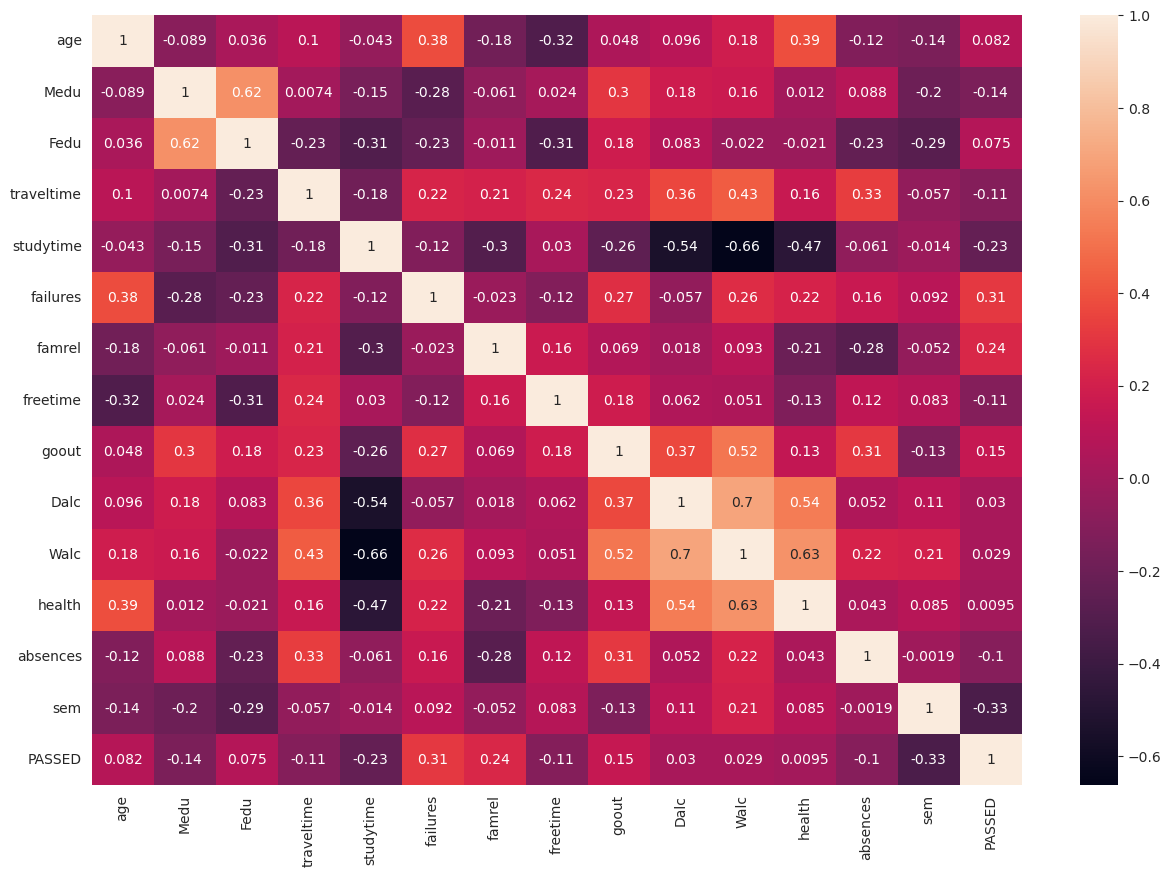

In [138]:
plot = sns.heatmap(df_strong_mistakes.corr(), annot=True)
plot.figure.set_size_inches(15, 10)

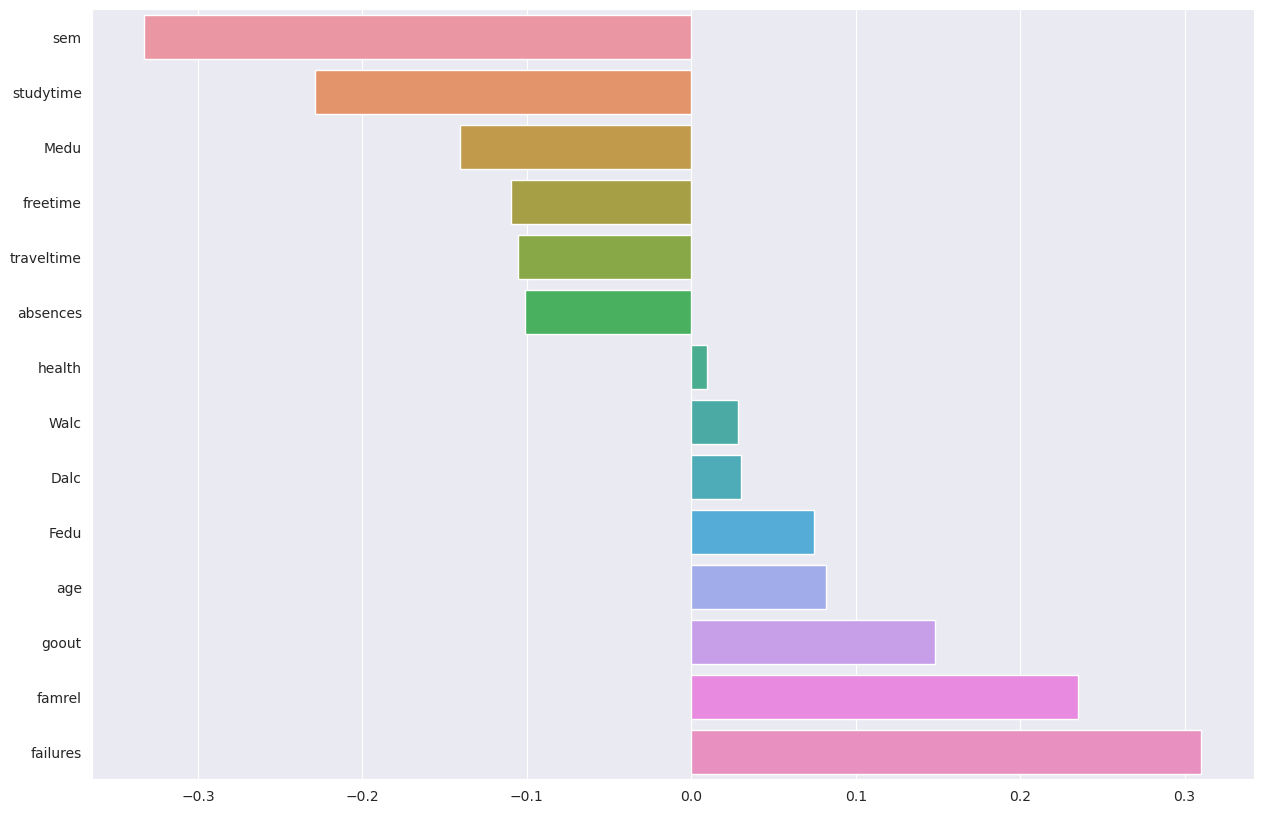

In [139]:
cor = df_strong_mistakes[numeric_features].corrwith(df_strong_mistakes.PASSED).sort_values()

plot = sns.barplot(x=cor, y=cor.index)
plot.figure.set_size_inches(15, 10)

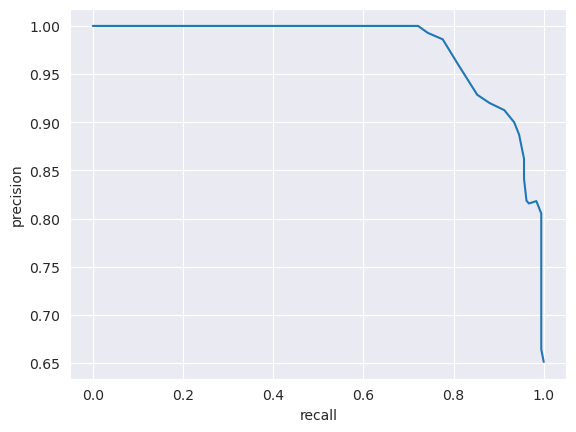

In [140]:
precision, recall, thresholds = precision_recall_curve(y_test, xgb_poly_select_k_tmp.predict_proba(X_test)[:, 1])
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()


In [141]:
auc(recall, precision)

0.9780412282892081

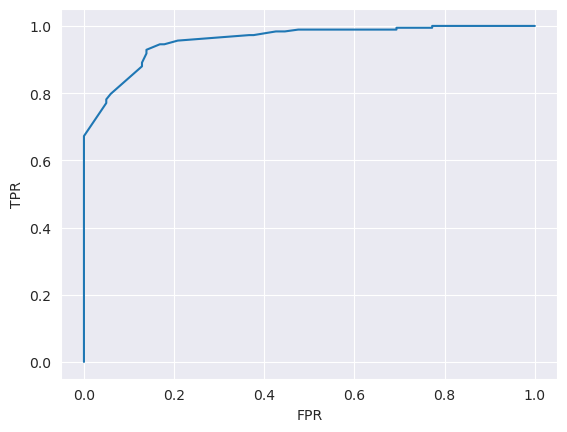

In [142]:
fpr, tpr, thresholds = roc_curve(y_test, xgb_kbin_select_k_tmp.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

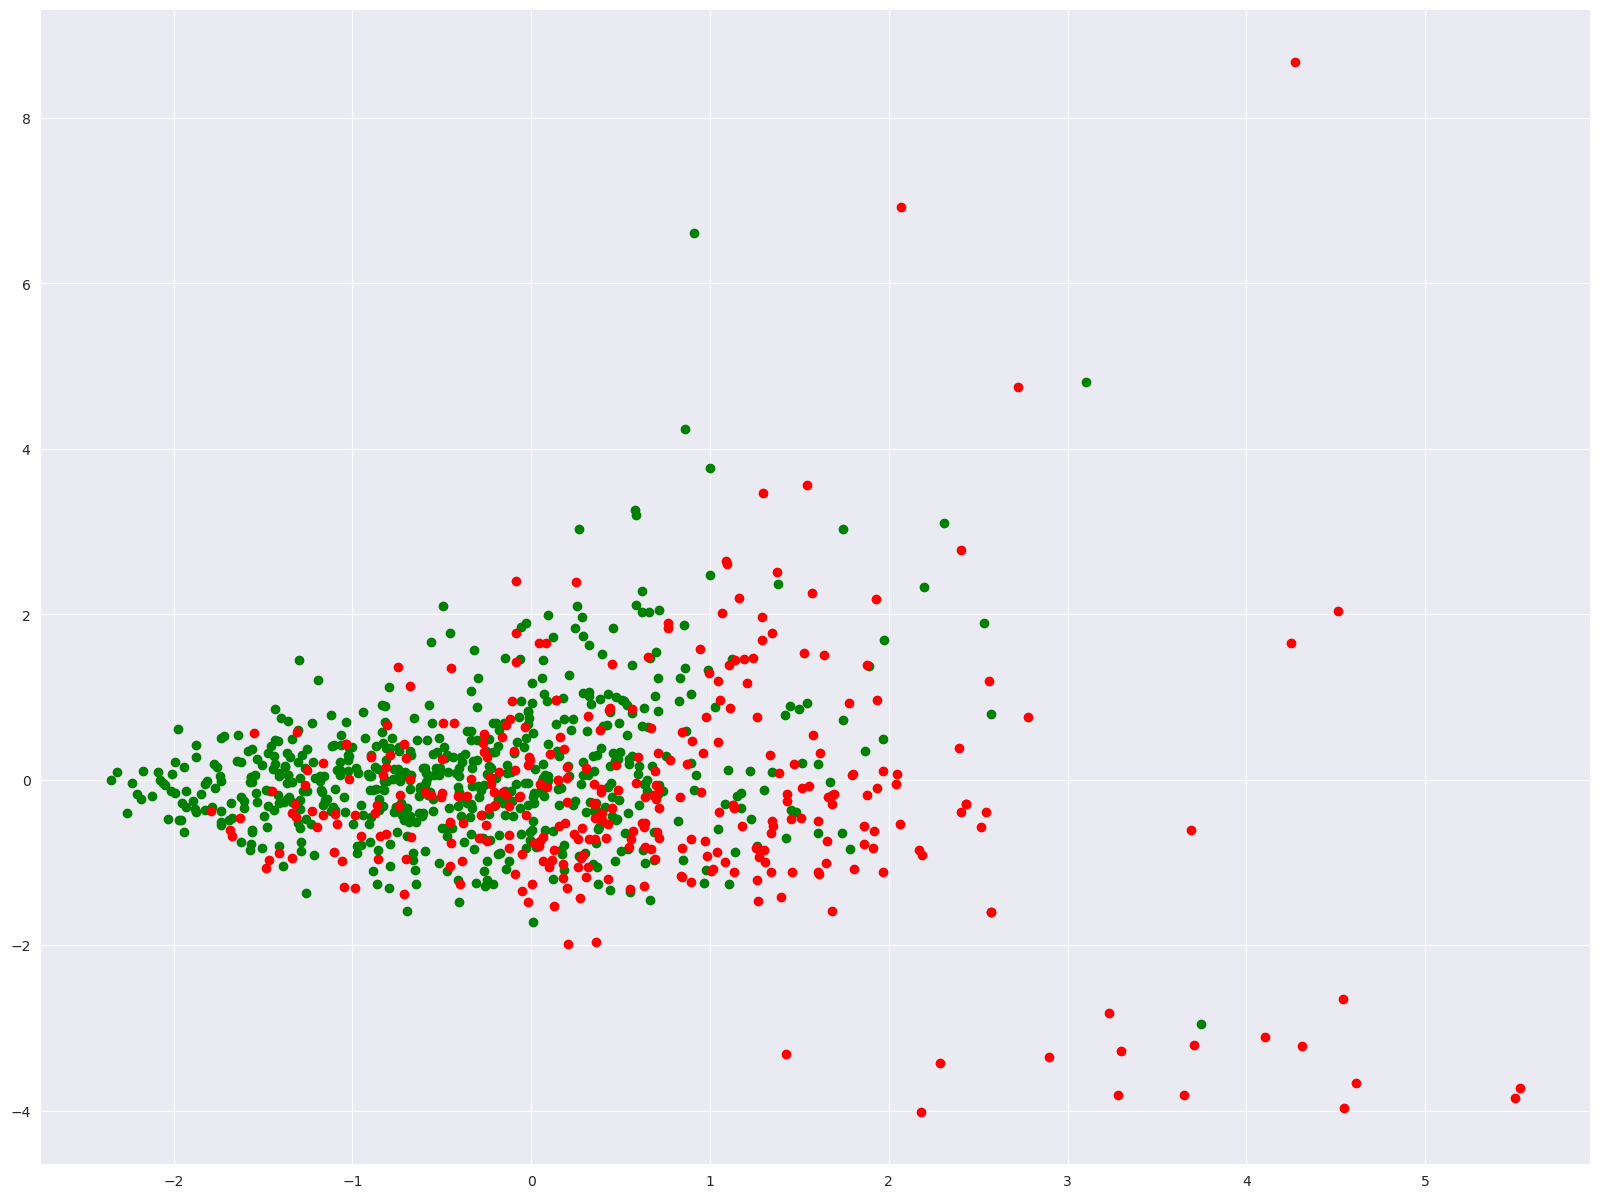

In [143]:
plt.figure(figsize=(20, 15))

pca_plot = PCA(n_components=2)

X_plot = pca_plot.fit_transform(column_trans_base.fit_transform(df.drop("PASSED", axis=1)))

plt.scatter(X_plot[df.PASSED == True][:, 0], X_plot[df.PASSED == True][:, 1], c="green")
plt.scatter(X_plot[df.PASSED == False][:, 0], X_plot[df.PASSED == False][:, 1], c="red")

plt.show()

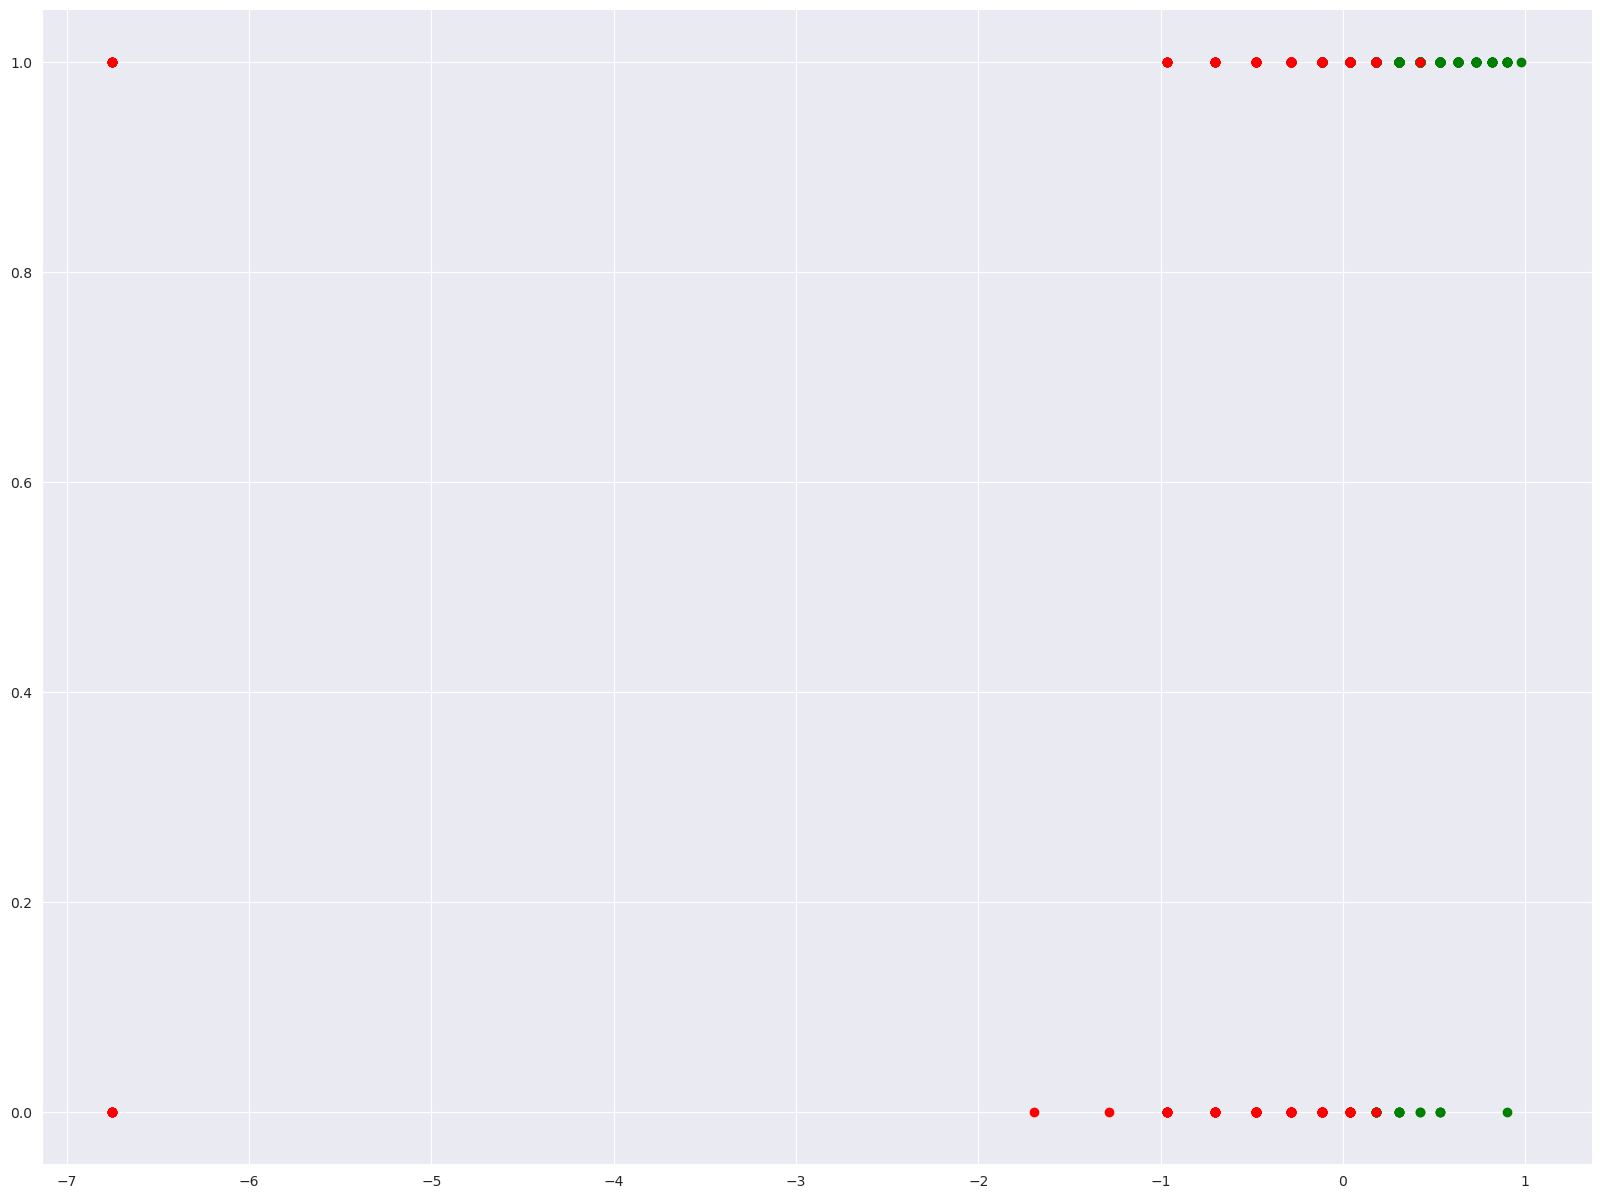

In [144]:
plt.figure(figsize=(20, 15))

select_k_plot = SelectKBest(k=2)

X_plot = select_k_plot.fit_transform(column_trans_base.fit_transform(df.drop("PASSED", axis=1)), df.PASSED)

plt.scatter(X_plot[df.PASSED == True][:, 0], X_plot[df.PASSED == True][:, 1], c="green")
plt.scatter(X_plot[df.PASSED == False][:, 0], X_plot[df.PASSED == False][:, 1], c="red")

plt.show()

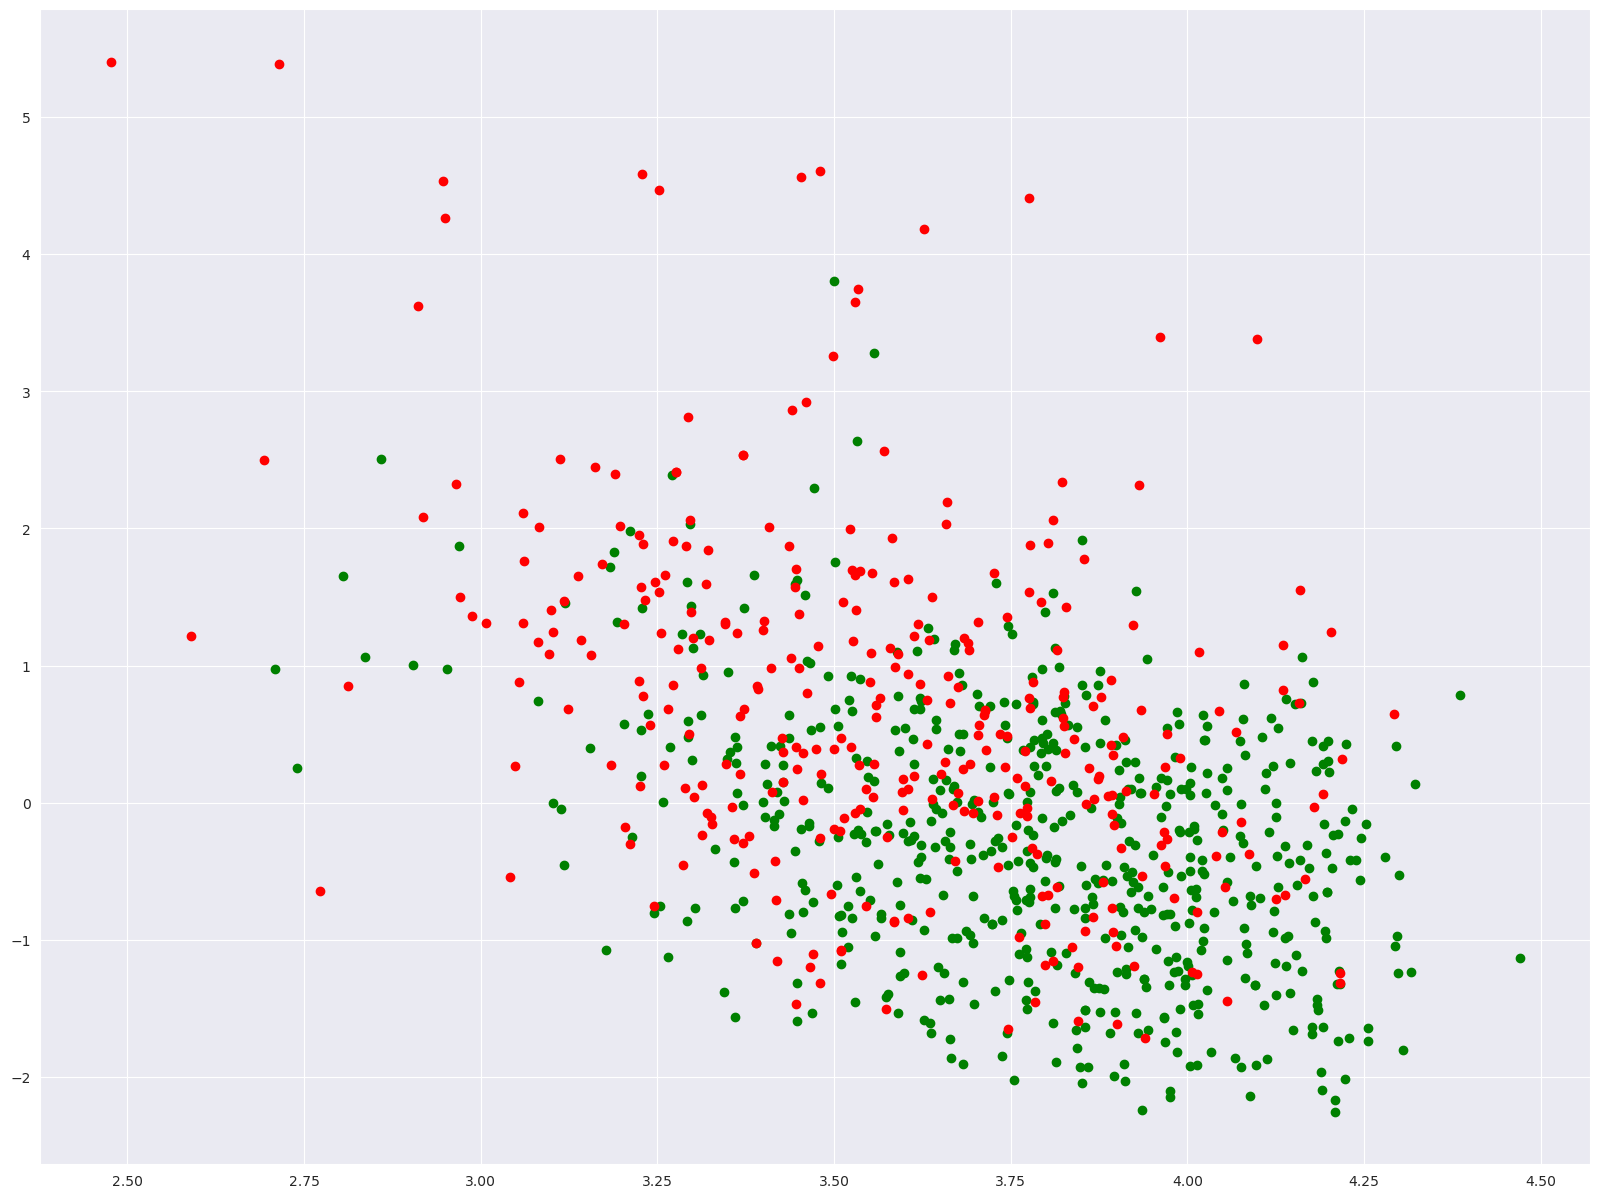

In [145]:
plt.figure(figsize=(20, 15))

trunc_plot = TruncatedSVD(n_components=2)

X_plot = trunc_plot.fit_transform(column_trans_base.fit_transform(df.drop("PASSED", axis=1)), df.PASSED)

plt.scatter(X_plot[df.PASSED == True][:, 0], X_plot[df.PASSED == True][:, 1], c="green")
plt.scatter(X_plot[df.PASSED == False][:, 0], X_plot[df.PASSED == False][:, 1], c="red")

plt.show()

In [146]:
X, y = df.drop("PASSED", axis=1), df.PASSED


xgb_final = Pipeline(steps=[("preprocesing", column_trans_kbin), ("select_k", SelectKBest(k=19)), ("estimator", XGBClassifier())])
xgb_final.fit(X[mask_95], y[mask_95])

y_pred = xgb_final.predict(X[mask_95])

print(f"Mean squared error:\n  train: {mean_squared_error(y_train, y_train_pred, squared=False)}\n\nPrecision score:\n  train: {precision_score(y_train, y_train_pred)}\n\nRecall score:\n  train: {recall_score(y_train, y_train_pred)}\n\nF1 score:\n  train: {f1_score(y_train, y_train_pred)}\n\nAccuracy score:\n  train: {accuracy_score(y_train, y_train_pred.round())}")

Mean squared error:
  train: 0.3138229572304239

Precision score:
  train: 0.9272300469483568

Recall score:
  train: 0.9207459207459208

F1 score:
  train: 0.9239766081871346

Accuracy score:
  train: 0.9015151515151515


In [147]:
%%time

X = SelectKBest(k=6).fit_transform(column_trans_kbin.fit_transform(df.drop("PASSED", axis=1)), df.PASSED)

param = {"penalty": ['l2', 'l1', 'elasticnet'], "alpha": np.logspace(-10, 10, 10), "learning_rate": ["constant", "optimal", "invscaling", "adaptive"], "max_iter": np.logspace(3, 10, 10), "l1_ratio": np.linspace(0, 1, 10)}

searcher = GridSearchCV(SGDClassifier(loss="log", eta0=0.1), param, scoring="accuracy", cv=10)
searcher.fit(X, y)

CPU times: user 4min 7s, sys: 174 ms, total: 4min 7s
Wall time: 4min 7s


GridSearchCV(cv=10, estimator=SGDClassifier(eta0=0.1, loss='log'),
             param_grid={'alpha': array([1.00000000e-10, 1.66810054e-08, 2.78255940e-06, 4.64158883e-04,
       7.74263683e-02, 1.29154967e+01, 2.15443469e+03, 3.59381366e+05,
       5.99484250e+07, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'max_iter': array([1.00000000e+03, 5.99484250e+03, 3.59381366e+04, 2.15443469e+05,
       1.29154967e+06, 7.74263683e+06, 4.64158883e+07, 2.78255940e+08,
       1.66810054e+09, 1.00000000e+10]),
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='accuracy')

In [150]:
searcher.best_params_

{'alpha': 0.0004641588833612782,
 'l1_ratio': 1.0,
 'learning_rate': 'optimal',
 'max_iter': 35938.13663804626,
 'penalty': 'l2'}

In [152]:
X, y = df.drop("PASSED", axis=1), df.PASSED

sgdclas_kbin_select_k_final = Pipeline(steps=[("preprocesing", column_trans_kbin), ("select_k", SelectKBest(k=6)), ("estimator", SGDClassifier(**searcher.best_params_, loss="log", random_state=88))])
sgdclas_kbin_select_k_final.fit(X, y)

y_pred = sgdclas_kbin_select_k_final.predict(X)

print(f"Mean squared error:\n  train: {mean_squared_error(y_train, y_train_pred, squared=False)}\n\nPrecision score:\n  train: {precision_score(y_train, y_train_pred)}\n\nRecall score:\n  train: {recall_score(y_train, y_train_pred)}\n\nF1 score:\n  train: {f1_score(y_train, y_train_pred)}\n\nAccuracy score:\n  train: {accuracy_score(y_train, y_train_pred.round())}")

Mean squared error:
  train: 0.3138229572304239

Precision score:
  train: 0.9272300469483568

Recall score:
  train: 0.9207459207459208

F1 score:
  train: 0.9239766081871346

Accuracy score:
  train: 0.9015151515151515


### Обрати найкращу модель яка розв'язує задачу класифікації. Для найкращої моделі знайти прогнози на вибірці `predict.csv`. Значення прогнозів та ймовірностей зберегти у файл `predictions_clf.csv`.
    


In [153]:
predictions = pd.read_csv("predict.csv")
predictions.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,sem
0,MS,M,16,U,GT3,T,1,1,at_home,services,...,no,yes,5,4,5,4,5,3,0,-2.302585
1,MS,F,17,U,GT3,T,1,1,other,at_home,...,no,no,4,3,2,1,2,5,9,1.960095
2,GP,F,18,U,LE3,T,2,2,at_home,services,...,yes,yes,5,3,1,1,1,5,16,2.091864
3,MS,F,18,U,GT3,T,2,2,other,other,...,yes,yes,1,3,1,1,1,2,4,2.091864
4,MS,M,17,U,GT3,T,1,2,other,other,...,yes,yes,5,3,5,5,5,1,12,1.808289
5,MS,F,18,R,GT3,T,2,2,at_home,other,...,no,no,5,3,3,1,3,4,0,2.646175
6,GP,M,19,U,GT3,T,4,2,health,other,...,yes,yes,5,4,4,1,1,1,9,2.312535
7,MS,F,18,U,GT3,T,1,1,other,other,...,no,no,1,1,1,1,1,5,6,2.406945
8,MS,M,17,U,GT3,T,2,3,other,services,...,yes,no,4,4,3,1,1,3,4,2.646175
9,MS,M,19,U,GT3,T,3,2,at_home,services,...,no,no,3,2,1,1,1,3,4,1.808289


In [154]:
# Зберегти прогнози у змінну best_clf_model_predictions та ймовірності у best_clf_model_predict_proba
best_clf_model_predictions = sgdclas_kbin_select_k_final.predict(predictions)
best_clf_model_predict_proba = sgdclas_kbin_select_k_final.predict_proba(predictions)

for t in zip(best_clf_model_predictions, best_clf_model_predict_proba[:,1]):
    print(*t)

False 7.00633999867512e-13
False 0.08432335918317846
False 0.05782436985644767
False 0.16870989959209265
False 0.05424684292497436
True 0.9759440344811084
True 0.8272888807315634
True 0.8976235602577123
True 0.9759440344811084
False 0.043797434711585564
False 0.14451603440138355
True 0.8272888807315634
True 0.8272888807315634
True 0.8272888807315634
False 0.14451603440138355
True 0.9383974185366537
True 0.9383974185366537
True 0.8976235602577123
True 0.8976235602577123
False 0.05782436985644767
True 0.9928842085006179
False 0.11886372681541567
False 0.05424684292497436
False 0.3584049943224358
True 0.8272888807315634
True 0.9928842085006179
False 0.3584049943224358
True 0.8976235602577123
True 0.8976235602577123
False 0.16870989959209265
False 0.3584049943224358
True 0.8976235602577123
False 0.05782436985644767
False 0.08432335918317846
True 0.8976235602577123
True 0.9383974185366537
False 0.11886372681541567
True 0.8272888807315634
True 0.9620193576390907
False 0.05782436985644767
Tru

In [155]:
# Запустити для створення файлу
pd.DataFrame(zip(best_clf_model_predictions, 
                 best_clf_model_predict_proba[:,1]), 
             columns=['preds', 'probas']).to_csv('predictions_clf.csv')



## Завдання 4. 

[1 бал]

Зберегти результати роботи у jupyter-ноутбук. Ноутбук повинен бути збережений у стані в якому усі клітинки запущені і не містити помилок. Формат назви файлу `М2_Прізвище_Ім'я.ipynb`. 

Окремо додати файл `predictions_clf.csv`.

Додатково можна отримати до [4 балів] за порівняннями результатів найкращих моделей завдань 2 та 3.
